
# Introduction to Machine Learning

An interactive Machine Learning example written in Python, broken into the following sections:

1. [Scope](#scope)
  1. [Problem Definition](#scope-problem-definition)
  1. [Data](#scope-data)
1. [Prepare](#prepare)
  1. [Import](#prepare-import)
  1. [Train Test Split](#prepare-train-test-split)
  1. [Cleaning](#prepare-cleaning)
1. [Analyze](#analyze)
  1. [Pre-processing](#analyze-pre-processing)
  1. [Modeling and Evaluation](#analyze-modeling-and-evaluation)
1. [Reflect](#reflect)

<a id='scope'></a>

## Scope

<a id='scope-problem-definition'></a>

### Problem Definition

We seek to answer the following questions by applying Machine Learning techniques to the NYC Mayor's Office of Sustainability dataset on green buildings and energy efficiency:

1. Given a buidling's characteristics, can we predict what its energy usage intensity will be?
  - Could be useful for urban planners to proactively estimate energy consumption of various of living spaces.
1. Given a buidling's characteristics and energy use, can we predict what its Energy Star rating would be?
  - Could be useful for Energy Star to assist in assigning ratings to buildings without a score.
  - Could be useful for architects to predict the Energy Star scores of different designs.
1. What sources of energy cause the most greenhouse gas emissions for a property?
  - Could be useful for policy makers to see what sources of energy produce the most greenhouse gas emissions.
1. What factors lead to energy loss between the source of generation and the site of the property?
  - Could be useful for engineers to identify which locations, property usages, sources of energy, etc. lead to the most energy loss and adjust the energy grid accordingly.
  
TODO
https://www.energystar.gov/buildings/facility-owners-and-managers/existing-buildings/use-portfolio-manager/interpret-your-results/what
And a score of 75 or higher means it’s a top performer and may be eligible for ENERGY STAR certification.

<a id='scope-data'></a>

### Data

#### Citation

```
NYC Mayor's Office of Sustainability, Green Buildings & Energy Efficiency. (2017). [Data set]. 
    Retrieved from http://www.nyc.gov/html/gbee/html/plan/ll84_scores.shtml
```

#### Dimensions

| Column                                                     | Functional Data Type    | Technical Data Type |
|------------------------------------------------------------|-------------------------|---------------------|
| Order                                                      | index                   | integer             |
| Property Id                                                | identifier              | text                |
| Property Name                                              | identifier              | text                |
| Parent Property Id                                         | identifier              | text                |
| Parent Property Name                                       | identifier              | text                |
| BBL - 10 digits                                            | identifier              | text                |
| NYC Borough, Block and Lot (BBL) self-reported             | identifier              | text                |
| NYC Building Identification Number (BIN)                   | identifier              | text                |
| Address 1 (self-reported)                                  | location                | text                |
| Address 2                                                  | location                | text                |
| Postal Code                                                | location                | text                |
| Street Number                                              | location                | text                |
| Street Name                                                | location                | text                |
| Borough                                                    | location                | catagorical         |
| DOF Gross Floor Area                                       | building characteristic | numeric             |
| Primary Property Type - Self Selected                      | building characteristic | categorical         |
| List of All Property Use Types at Property                 | building characteristic | [categorical]       |
| Largest Property Use Type                                  | building characteristic | categorical         |
| Largest Property Use Type - Gross Floor Area (ft²)         | building characteristic | numeric             |
| 2nd Largest Property Use Type                              | building characteristic | categorical         |
| 2nd Largest Property Use - Gross Floor Area (ft²)          | building characteristic | numeric             |
| 3rd Largest Property Use Type                              | building characteristic | categorical         |
| 3rd Largest Property Use Type - Gross Floor Area (ft²)     | building characteristic | numeric             |
| Year Built                                                 | building characteristic | time                |
| Number of Buildings - Self-reported                        | building characteristic | integer             |
| Occupancy                                                  | building characteristic | percentage          |
| Metered Areas (Energy)                                     | building characteristic | categorical         |
| Metered Areas (Water)                                      | building characteristic | categorical         |
| ENERGY STAR Score                                          | score                   | numeric             |
| Site EUI (kBtu/ft²)                                        | energy usage            | numeric             |
| Weather Normalized Site EUI (kBtu/ft²)                     | energy usage            | numeric             |
| Weather Normalized Site Electricity Intensity (kWh/ft²)    | energy usage            | numeric             |
| Weather Normalized Site Natural Gas Intensity (therms/ft²) | energy usage            | numeric             |
| Weather Normalized Source EUI (kBtu/ft²)                   | energy usage            | numeric             |
| Fuel Oil #1 Use (kBtu)                                     | energy usage            | numeric             |
| Fuel Oil #2 Use (kBtu)                                     | energy usage            | numeric             |
| Fuel Oil #4 Use (kBtu)                                     | energy usage            | numeric             |
| Fuel Oil #5 &amp; 6 Use (kBtu)                             | energy usage            | numeric             |
| Diesel #2 Use (kBtu)                                       | energy usage            | numeric             |
| District Steam Use (kBtu)                                  | energy usage            | numeric             |
| Natural Gas Use (kBtu)                                     | energy usage            | numeric             |
| Weather Normalized Site Natural Gas Use (therms)           | energy usage            | numeric             |
| Electricity Use - Grid Purchase (kBtu)                     | energy usage            | numeric             |
| Weather Normalized Site Electricity (kWh)                  | energy usage            | numeric             |
| Total GHG Emissions (Metric Tons CO2e)                     | environmental footprint | numeric             |
| Direct GHG Emissions (Metric Tons CO2e)                    | environmental footprint | numeric             |
| Indirect GHG Emissions (Metric Tons CO2e)                  | environmental footprint | numeric             |
| Property GFA - Self-Reported (ft²)                         | building characteristic | numeric             |
| Water Use (All Water Sources) (kgal)                       | resource usage          | numeric             |
| Water Intensity (All Water Sources) (gal/ft²)              | resource usage          | numeric             |
| Source EUI (kBtu/ft²)                                      | energy usage            | numeric             |
| Release Date                                               | metadata                | time                |
| Water Required?                                            | building characteristic | categorical         |
| DOF Benchmarking Submission Status                         | metadata                | categorical         |

<a id='prepare'></a>

## Prepare

<a id='prepare-import'></a>

### Import

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import the data
data_path = os.path.join(os.path.abspath('..'), 'data', 'nyc_benchmarking_disclosure_data_reported_in_2017.xlsx')
df = pd.read_excel(data_path, sheet_name='Information and Metrics')

In [3]:
# View the structure of the data
df.head()

Order  Property Id                                 Property Name  \
0      1        13286                                       201/205   
1      2        28400                    NYP Columbia (West Campus)   
2      3      4778226                                 MSCHoNY North   
3      4      4778267  Herbert Irving Pavilion & Millstein Hospital   
4      5      4778288                               Neuro Institute   

  Parent Property Id        Parent Property Name BBL - 10 digits  \
0              13286                     201/205      1013160001   
1              28400  NYP Columbia (West Campus)      1021380040   
2              28400  NYP Columbia (West Campus)      1021380030   
3              28400  NYP Columbia (West Campus)      1021390001   
4              28400  NYP Columbia (West Campus)      1021390085   

  NYC Borough, Block and Lot (BBL) self-reported  \
0                                     1013160001   
1                                   1-02138-0040   
2                                   1-02138-0030   
3                                   1-02139-0001   
4                                   1-02139-0085   

            NYC Building Identification Number (BIN)  \
0                                            1037549   
1  1084198; 1084387;1084385; 1084386; 1084388; 10...   
2                                            1063380   
3                                   1087281; 1076746   
4                                            1063403   

  Address 1 (self-reported)                Address 2  \
0  201/205  East  42nd  st.            Not Available   
1          622 168th Street            Not Available   
2             3975 Broadway            Not Available   
3   161 Fort Washington Ave  177 Fort Washington Ave   
4     710 West 168th Street            Not Available   

                 ...                 Total GHG Emissions (Metric Tons CO2e)  \
0                ...                                                 6962.2   
1                ...                                                55870.4   
2                ...                                                      0   
3                ...                                                      0   
4                ...                                                      0   

  Direct GHG Emissions (Metric Tons CO2e)  \
0                                       0   
1                                 51016.4   
2                                       0   
3                                       0   
4                                       0   

  Indirect GHG Emissions (Metric Tons CO2e)  \
0                                    6962.2   
1                                    4854.1   
2                                         0   
3                                         0   
4                                         0   

  Property GFA - Self-Reported (ft²)  Water Use (All Water Sources) (kgal)  \
0                             762051                         Not Available   
1                            3889181                         Not Available   
2                             231342                         Not Available   
3                            1305748                         Not Available   
4                             179694                         Not Available   

  Water Intensity (All Water Sources) (gal/ft²) Source EUI (kBtu/ft²)  \
0                                 Not Available                 619.4   
1                                 Not Available                 404.3   
2                                 Not Available         Not Available   
3                                 Not Available         Not Available   
4                                 Not Available         Not Available   

         Release Date Water Required? DOF Benchmarking Submission Status  
0 2017-05-01 17:32:03              No                      In Compliance  
1 2017-04-27 11:23:27              No                      In Compliance  
2 2017-04-27 11:23

<a id='prepare-train-test-split'></a>

### Train Test Split

In [4]:
# Hold out a portion of the data for testing
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.25)

# Furthermore, hold out a portion of the training set for validation
df_train, df_valid = train_test_split(df_train, test_size=0.25)

# Print the shape of each
print(df_train.shape)
print(df_valid.shape)
print(df_test.shape)

(6606, 54)
(2203, 54)
(2937, 54)


<a id='prepare-cleaning'></a>

### Cleaning

#### Column Types

In [5]:
# We will define each cleaning step as a function,
# so that we can apply the same rules to our validation and test sets
def clean_missing_value_text(df, text):
    return df.replace(text, np.NaN)

In [6]:
def clean_col_types(df):
    return df.astype(dtype={'Order': 'int64',
                            'Property Id': 'object',
                            'Property Name': 'object',
                            'Parent Property Id': 'object',
                            'Parent Property Name': 'object',
                            'BBL - 10 digits': 'object',
                            'NYC Borough, Block and Lot (BBL) self-reported': 'object',
                            'NYC Building Identification Number (BIN)': 'object',
                            'Address 1 (self-reported)': 'object',
                            'Address 2': 'object',
                            'Postal Code': 'object',
                            'Street Number': 'object',
                            'Street Name': 'object',
                            'Borough': 'category',
                            'DOF Gross Floor Area': 'float64',
                            'Primary Property Type - Self Selected': 'category',
                            'List of All Property Use Types at Property': 'object',
                            'Largest Property Use Type': 'category',
                            'Largest Property Use Type - Gross Floor Area (ft²)': 'float64',
                            '2nd Largest Property Use Type': 'category',
                            '2nd Largest Property Use - Gross Floor Area (ft²)': 'float64',
                            '3rd Largest Property Use Type': 'category',
                            '3rd Largest Property Use Type - Gross Floor Area (ft²)': 'float64',
                            'Year Built': 'int64',
                            'Number of Buildings - Self-reported': 'int64',
                            'Occupancy': 'float64',
                            'Metered Areas (Energy)': 'category',
                            'Metered Areas  (Water)': 'category',
                            'ENERGY STAR Score': 'float64',
                            'Site EUI (kBtu/ft²)': 'float64',
                            'Weather Normalized Site EUI (kBtu/ft²)': 'float64',
                            'Weather Normalized Site Electricity Intensity (kWh/ft²)': 'float64',
                            'Weather Normalized Site Natural Gas Intensity (therms/ft²)': 'float64',
                            'Weather Normalized Source EUI (kBtu/ft²)': 'float64',
                            'Fuel Oil #1 Use (kBtu)': 'float64',
                            'Fuel Oil #2 Use (kBtu)': 'float64',
                            'Fuel Oil #4 Use (kBtu)': 'float64',
                            'Fuel Oil #5 & 6 Use (kBtu)': 'float64',
                            'Diesel #2 Use (kBtu)': 'float64',
                            'District Steam Use (kBtu)': 'float64',
                            'Natural Gas Use (kBtu)': 'float64',
                            'Weather Normalized Site Natural Gas Use (therms)': 'float64',
                            'Electricity Use - Grid Purchase (kBtu)': 'float64',
                            'Weather Normalized Site Electricity (kWh)': 'float64',
                            'Total GHG Emissions (Metric Tons CO2e)': 'float64',
                            'Direct GHG Emissions (Metric Tons CO2e)': 'float64',
                            'Indirect GHG Emissions (Metric Tons CO2e)': 'float64',
                            'Property GFA - Self-Reported (ft²)': 'float64',
                            'Water Use (All Water Sources) (kgal)': 'float64',
                            'Water Intensity (All Water Sources) (gal/ft²)': 'float64',
                            'Source EUI (kBtu/ft²)': 'float64',
                            'Release Date': 'int64',
                            'Water Required?': 'category',
                            'DOF Benchmarking Submission Status': 'category'})

In [7]:
def print_title(title):
    print()
    print(title)
    print('-' * len(title))    

In [8]:
# Notice above that missing values are actually listed as 'Not Available'
# We cannot set columns to a numeric data type correctly when they contain the 'Not Available' text
# Instead, we can replace each 'Not Available' with NaN, which is widely recognized by Python libraries
df_train = clean_missing_value_text(df_train, text='Not Available')

# See what the column types are now
# Will want to change these based on the dimensions table above
print_title('Data types - before cleaning')
df_train.info()

# Clean the column types
df_train = clean_col_types(df_train)

# Confirm that the types were changed
print_title('Data types - after cleaning')
df_train.info()


Data types - before cleaning
----------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6606 entries, 7661 to 2492
Data columns (total 54 columns):
Order                                                         6606 non-null int64
Property Id                                                   6606 non-null int64
Property Name                                                 6606 non-null object
Parent Property Id                                            6606 non-null object
Parent Property Name                                          6606 non-null object
BBL - 10 digits                                               6606 non-null object
NYC Borough, Block and Lot (BBL) self-reported                6600 non-null object
NYC Building Identification Number (BIN)                      6509 non-null object
Address 1 (self-reported)                                     6606 non-null object
Address 2                                                     112 non-null object
Post

#### Missing Values

In [9]:
# Function to calculate the percent of missing values for each column in a data frame
def calc_percent_nan_col(df):
    return df.isna().sum(axis=0)/df.shape[0] * 100

In [10]:
# Function to calculate the percent of missing values for each row in a data frame
def calc_percent_nan_row(df):
    return df.isna().sum(axis=1)/df.shape[1] * 100

In [11]:
# Function to pretty print pandas objects in percent format (like 100.00%)
def pprint_percent(pd_obj):
    
    # Format percents like 100.00%
    original_format = pd.options.display.float_format
    pd.options.display.float_format = '{:.2f}%'.format
    
    # Print
    print()
    print(pd_obj)
    print()
    
    # Reset the pandas formatter
    pd.options.display.float_format = original_format

In [12]:
# Function to remove columns and rows that have over a certain percent missing values
def clean_missing_values(df, col_perc=33, row_perc=33):

    # Remove all columns that have more than p% missing values
    df = df.loc[:, calc_percent_nan_col(df) < col_perc]
    
    # Remove all rows that have more than p% missing values
    df = df.loc[calc_percent_nan_row(df) < row_perc, :]
        
    return df


Percent NaNs in each column - before cleaning
---------------------------------------------

Order                                                         0.00%
Property Id                                                   0.00%
Property Name                                                 0.00%
Parent Property Id                                            0.00%
Parent Property Name                                          0.00%
BBL - 10 digits                                               0.00%
NYC Borough, Block and Lot (BBL) self-reported                0.09%
NYC Building Identification Number (BIN)                      1.47%
Address 1 (self-reported)                                     0.00%
Address 2                                                    98.30%
Postal Code                                                   0.00%
Street Number                                                 0.94%
Street Name                                                   0.91%
Borough               

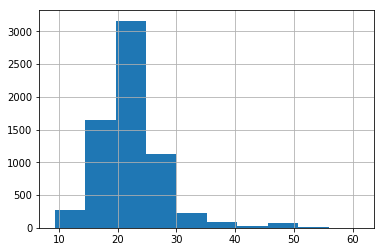


Percent NaNs in each column - after cleaning
--------------------------------------------

Order                                                         0.00%
Property Id                                                   0.00%
Property Name                                                 0.00%
Parent Property Id                                            0.00%
Parent Property Name                                          0.00%
BBL - 10 digits                                               0.00%
NYC Borough, Block and Lot (BBL) self-reported                0.02%
NYC Building Identification Number (BIN)                      1.42%
Address 1 (self-reported)                                     0.00%
Postal Code                                                   0.00%
Street Number                                                 0.68%
Street Name                                                   0.65%
Borough                                                       0.63%
DOF Gross Floor Area    

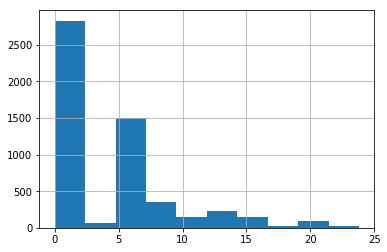

In [13]:
# See what percent of each column in the training set is missing values
print_title('Percent NaNs in each column - before cleaning')
pprint_percent(calc_percent_nan_col(df_train))

# See what percent of each row in the training set is missing values
hist = calc_percent_nan_row(df_train).hist()
print_title('Percent NaNs in each row - before cleaning')
plt.show()

# Remove rows missing the target
df_train = df_train.loc[-df_train.loc[:, 'ENERGY STAR Score'].isna(), :]

# Clean
df_train = clean_missing_values(df_train)

# See what percent of each column in the training set is missing values, after cleaning
print_title('Percent NaNs in each column - after cleaning')
pprint_percent(calc_percent_nan_col(df_train))

# See what percent of each row in the training set is missing values, after cleaning
print_title('Percent NaNs in each row - after cleaning')
hist = calc_percent_nan_row(df_train).hist()
plt.show()


#### Outliers

In [14]:
# https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
def clean_outliers(df, lower_quantile=0.25, upper_quantile=0.75, lower_multiplier=3, upper_multiplier=3):
    
    # Inner quartile
    q1 = df.quantile(lower_quantile)
    q3 = df.quantile(upper_quantile)
    iq = q3 - q1

    # Lower bound
    lb = q1 - lower_multiplier * iq

    # Upper bound
    ub = q3 + upper_multiplier * iq

    # Remove the outliers (but keep missing values)
    for col in lb.index:
        df = df.loc[(df[col] >= lb[col]) | df[col].isna(), :] # Remove lower-bound outliers
        df = df.loc[(df[col] <= ub[col]) | df[col].isna(), :] # Remove upper-bound outliers
    return df


Histograms - before cleaning
----------------------------


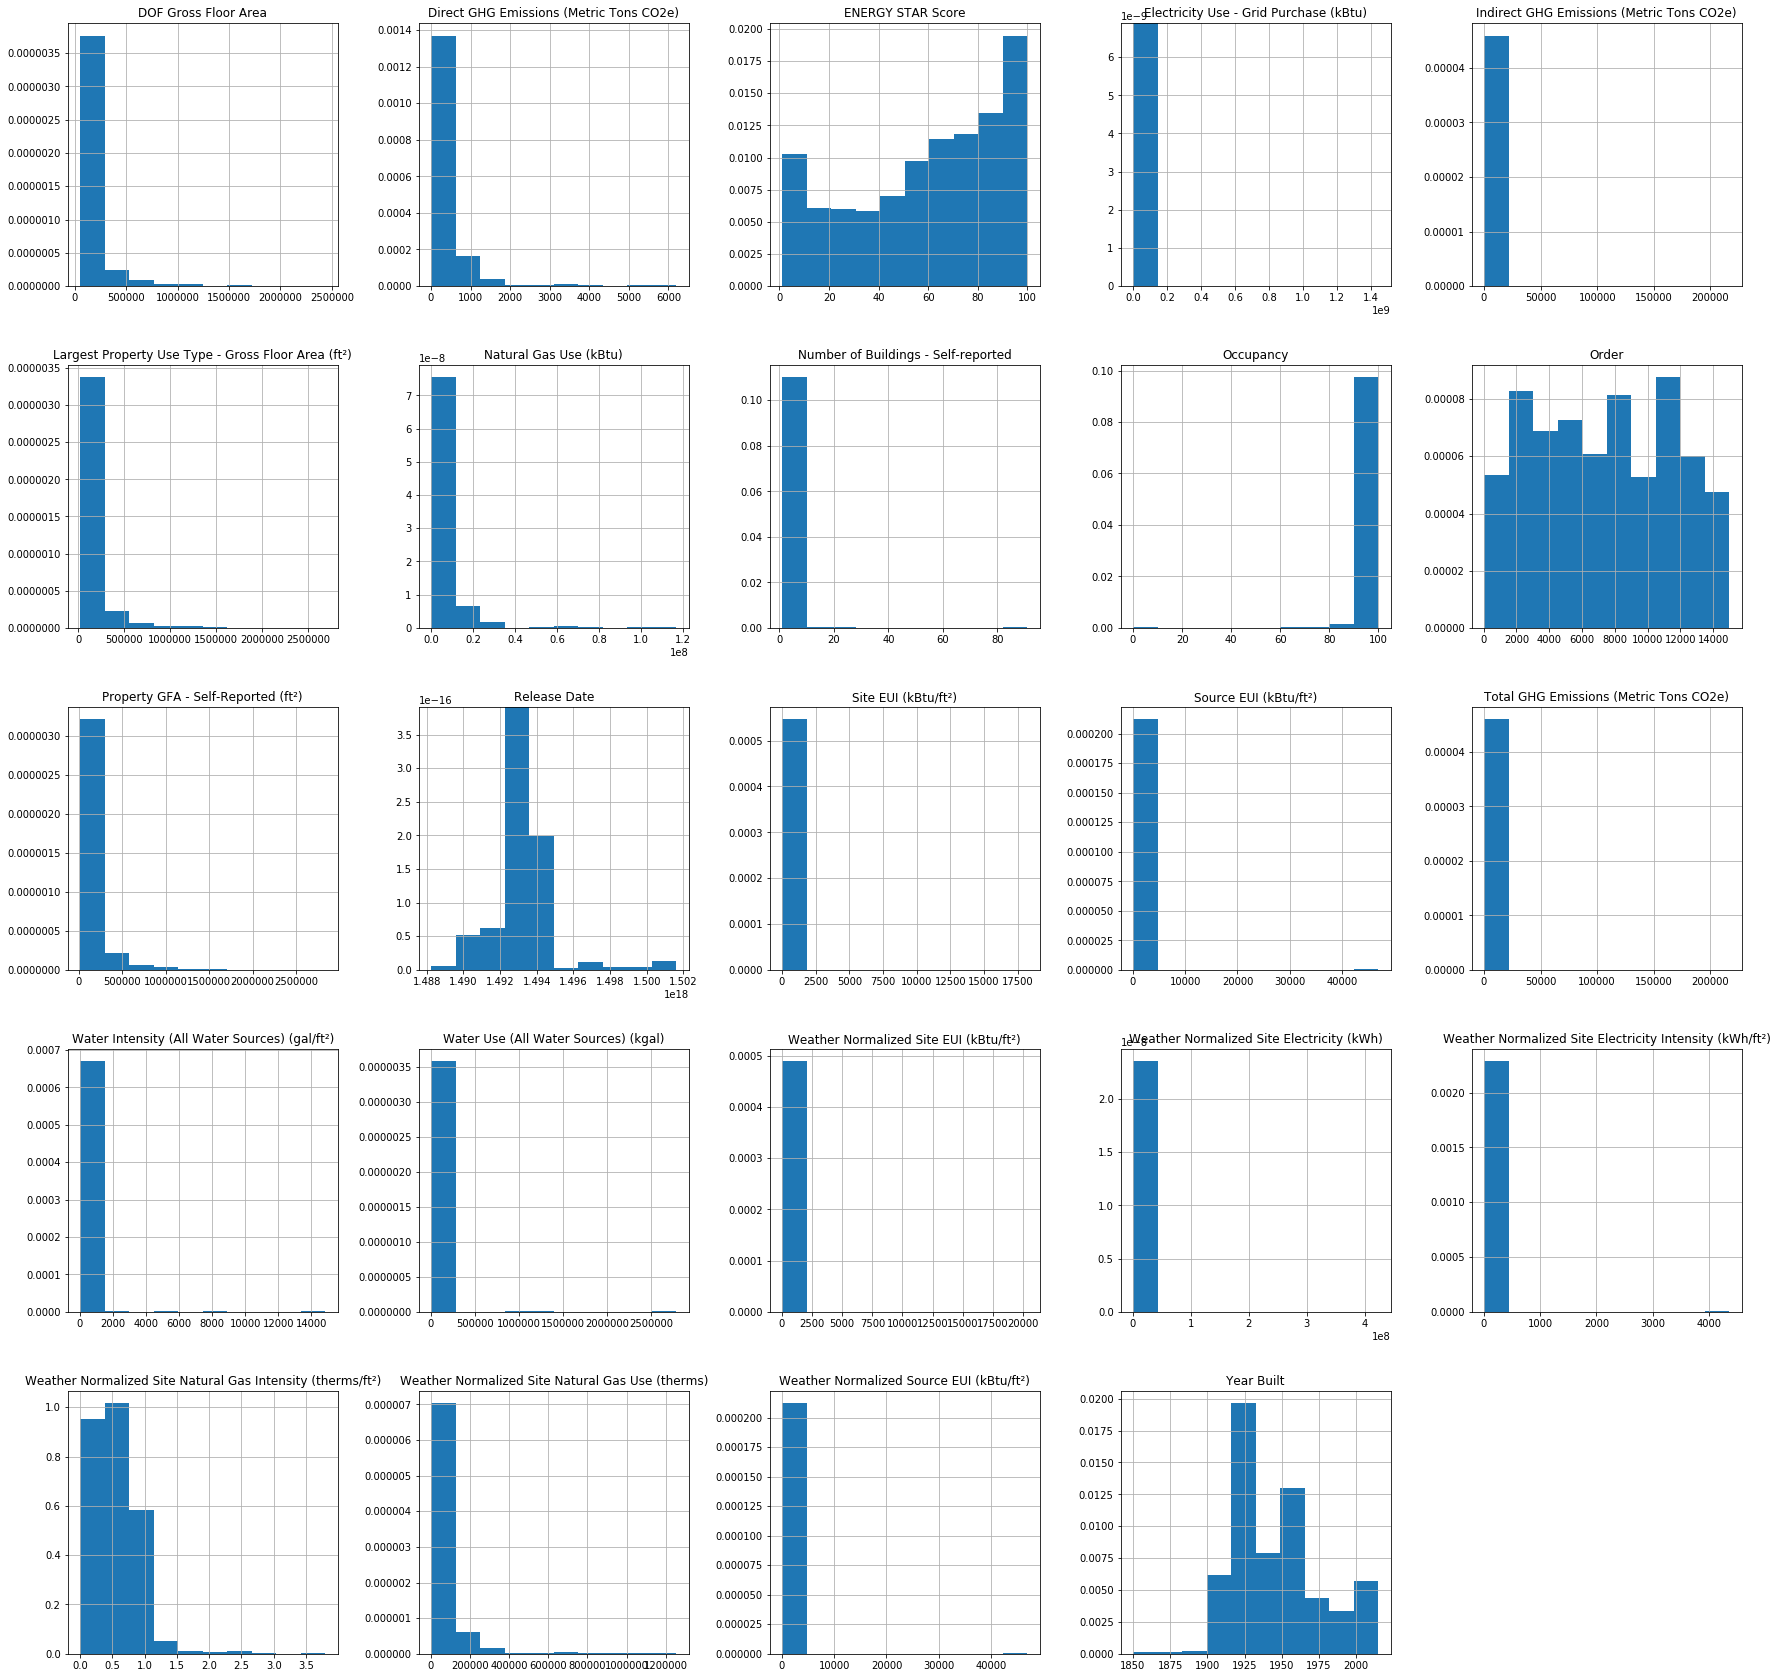


Histograms - after cleaning
---------------------------


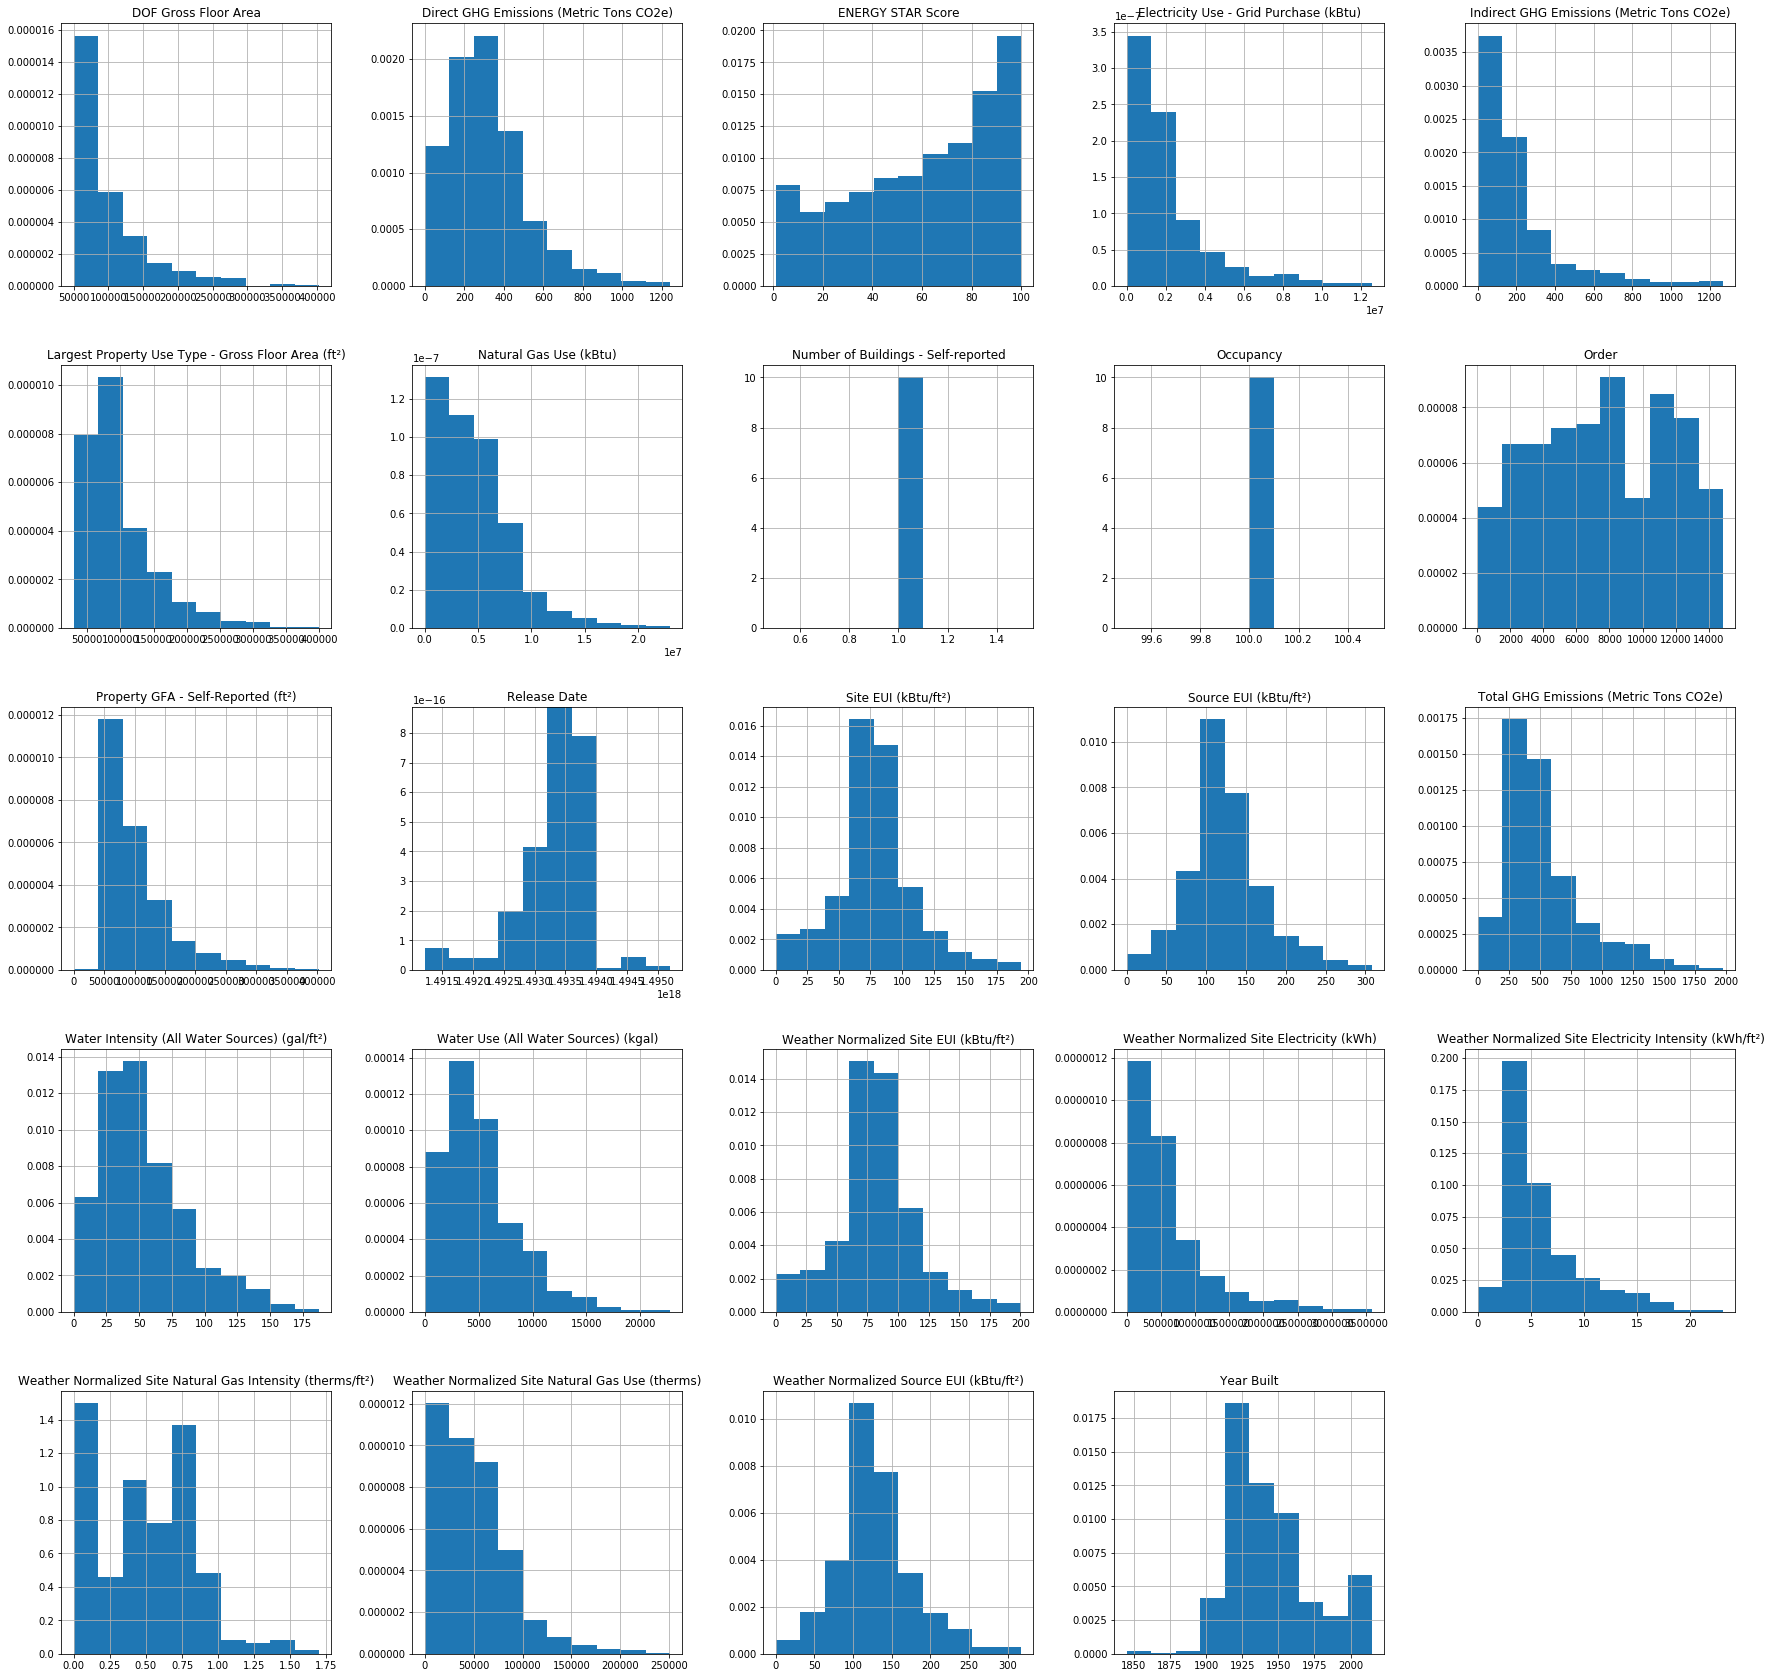

In [15]:
# Check the distributions of numeric columns before cleaning outliers
# Note the large domain
print_title('Histograms - before cleaning')
hist = df_train.sample(1000).hist(figsize=(30, 30), density=True)
plt.show()

# Remove outliers
df_train = clean_outliers(df_train)

# Now we have cleaner numeric columns
print_title('Histograms - after cleaning')
hist = df_train.sample(1000).hist(figsize=(30, 30), density=True)
plt.show()

<a id='analyze'></a>

## Analyze

<a id='analyze-pre-processing'></a>

### Pre-processing

#### Feature Engineering

In [16]:
# Transmission loss
df_train['Transmission Loss (kBtu/ft²)'] = df_train.loc[:, 'Source EUI (kBtu/ft²)'] - df_train.loc[:, 'Site EUI (kBtu/ft²)']

In [17]:
# GHG emissions per square foot
df_train['GHG Intensity (Metric Tons CO2e/ft²)'] = df_train.loc[:, 'Total GHG Emissions (Metric Tons CO2e)'] / df_train.loc[:, 'Property GFA - Self-Reported (ft²)']

In [18]:
# Years old
df_train['Years Old'] = 2018 - df_train.loc[:, 'Year Built']

In [19]:
# Remove outliers again
df_train = clean_outliers(df_train)

In [20]:
df_train.head()

Order Property Id                         Property Name  \
7661    9355     3538740                      159 Eastern Pkwy   
10210  12837     2789660              Gregory Hall Condominium   
4249    4857     2684315             DEPM 1170 - 1165 Park Ave   
6392    7725     4835922          Bajraktari: 80 STRONG STREET   
8905   11174     3120901  1082_1391_8301 Bay Parkway, Brooklyn   

                        Parent Property Id  \
7661   Not Applicable: Standalone Property   
10210  Not Applicable: Standalone Property   
4249   Not Applicable: Standalone Property   
6392   Not Applicable: Standalone Property   
8905   Not Applicable: Standalone Property   

                      Parent Property Name BBL - 10 digits  \
7661   Not Applicable: Standalone Property      3011790097   
10210  Not Applicable: Standalone Property      4018377501   
4249   Not Applicable: Standalone Property      1015210001   
6392   Not Applicable: Standalone Property      2032490025   
8905   Not Applicable: Standalone Property      3063310006   

      NYC Borough, Block and Lot (BBL) self-reported  \
7661                                      3011790097   
10210                                   4-01837-7501   
4249                                    1-01521-0001   
6392                                    2-03249-0025   
8905                                    3-06331-0006   

      NYC Building Identification Number (BIN) Address 1 (self-reported)  \
7661                           3324440;3324439       159 Eastern Parkway   
10210                                  4045238       88 - 30 51st Avenue   
4249                                   1048335          1165 Park Avenue   
6392                                   2015301          80 STRONG STREET   
8905                                   3165281          8301 Bay Parkway   

      Postal Code    ...     Property GFA - Self-Reported (ft²)  \
7661        11238    ...                                57850.0   
10210       11373    ...                                69137.0   
4249        10128    ...                               190943.0   
6392        10468    ...                                67300.0   
8905        11214    ...                               113232.0   

      Water Use (All Water Sources) (kgal)  \
7661                                2201.5   
10210                                  NaN   
4249                                4217.5   
6392                                   NaN   
8905                                   NaN   

      Water Intensity (All Water Sources) (gal/ft²)  Source EUI (kBtu/ft²)  \
7661                                          38.06                  117.0   
10210                                           NaN                  101.4   
4249                                          22.09                  107.7   
6392                                            NaN                  107.2   
8905                                            NaN                   84.4   

              Release Date Water Required? DOF Benchmarking Submission Status  \
7661   1493679744000000000             Yes                      In Compliance   
10210  1493555696000000000             Yes                      In Compliance   
4249   1493650694000000000              No                      In Compliance   
6392   1493211929000000000             Yes                      In Compliance   
8905   1493403582000000000             Yes                      In Compliance   

       Transmission Loss (kBtu/ft²)  GHG Intensity (Metric Tons CO2e/ft²)  \
7661                           33.7                              0.005053   
10210                          32.5                              0.004212   
4249                           47.4                              0.004046   
6392                           28.6                              0.005627   
8905                           24.6                              0.003692   

       Years Old  
7661          91  
10210         57  
4249      

#### Normalization


Histograms - before normalization
---------------------------------


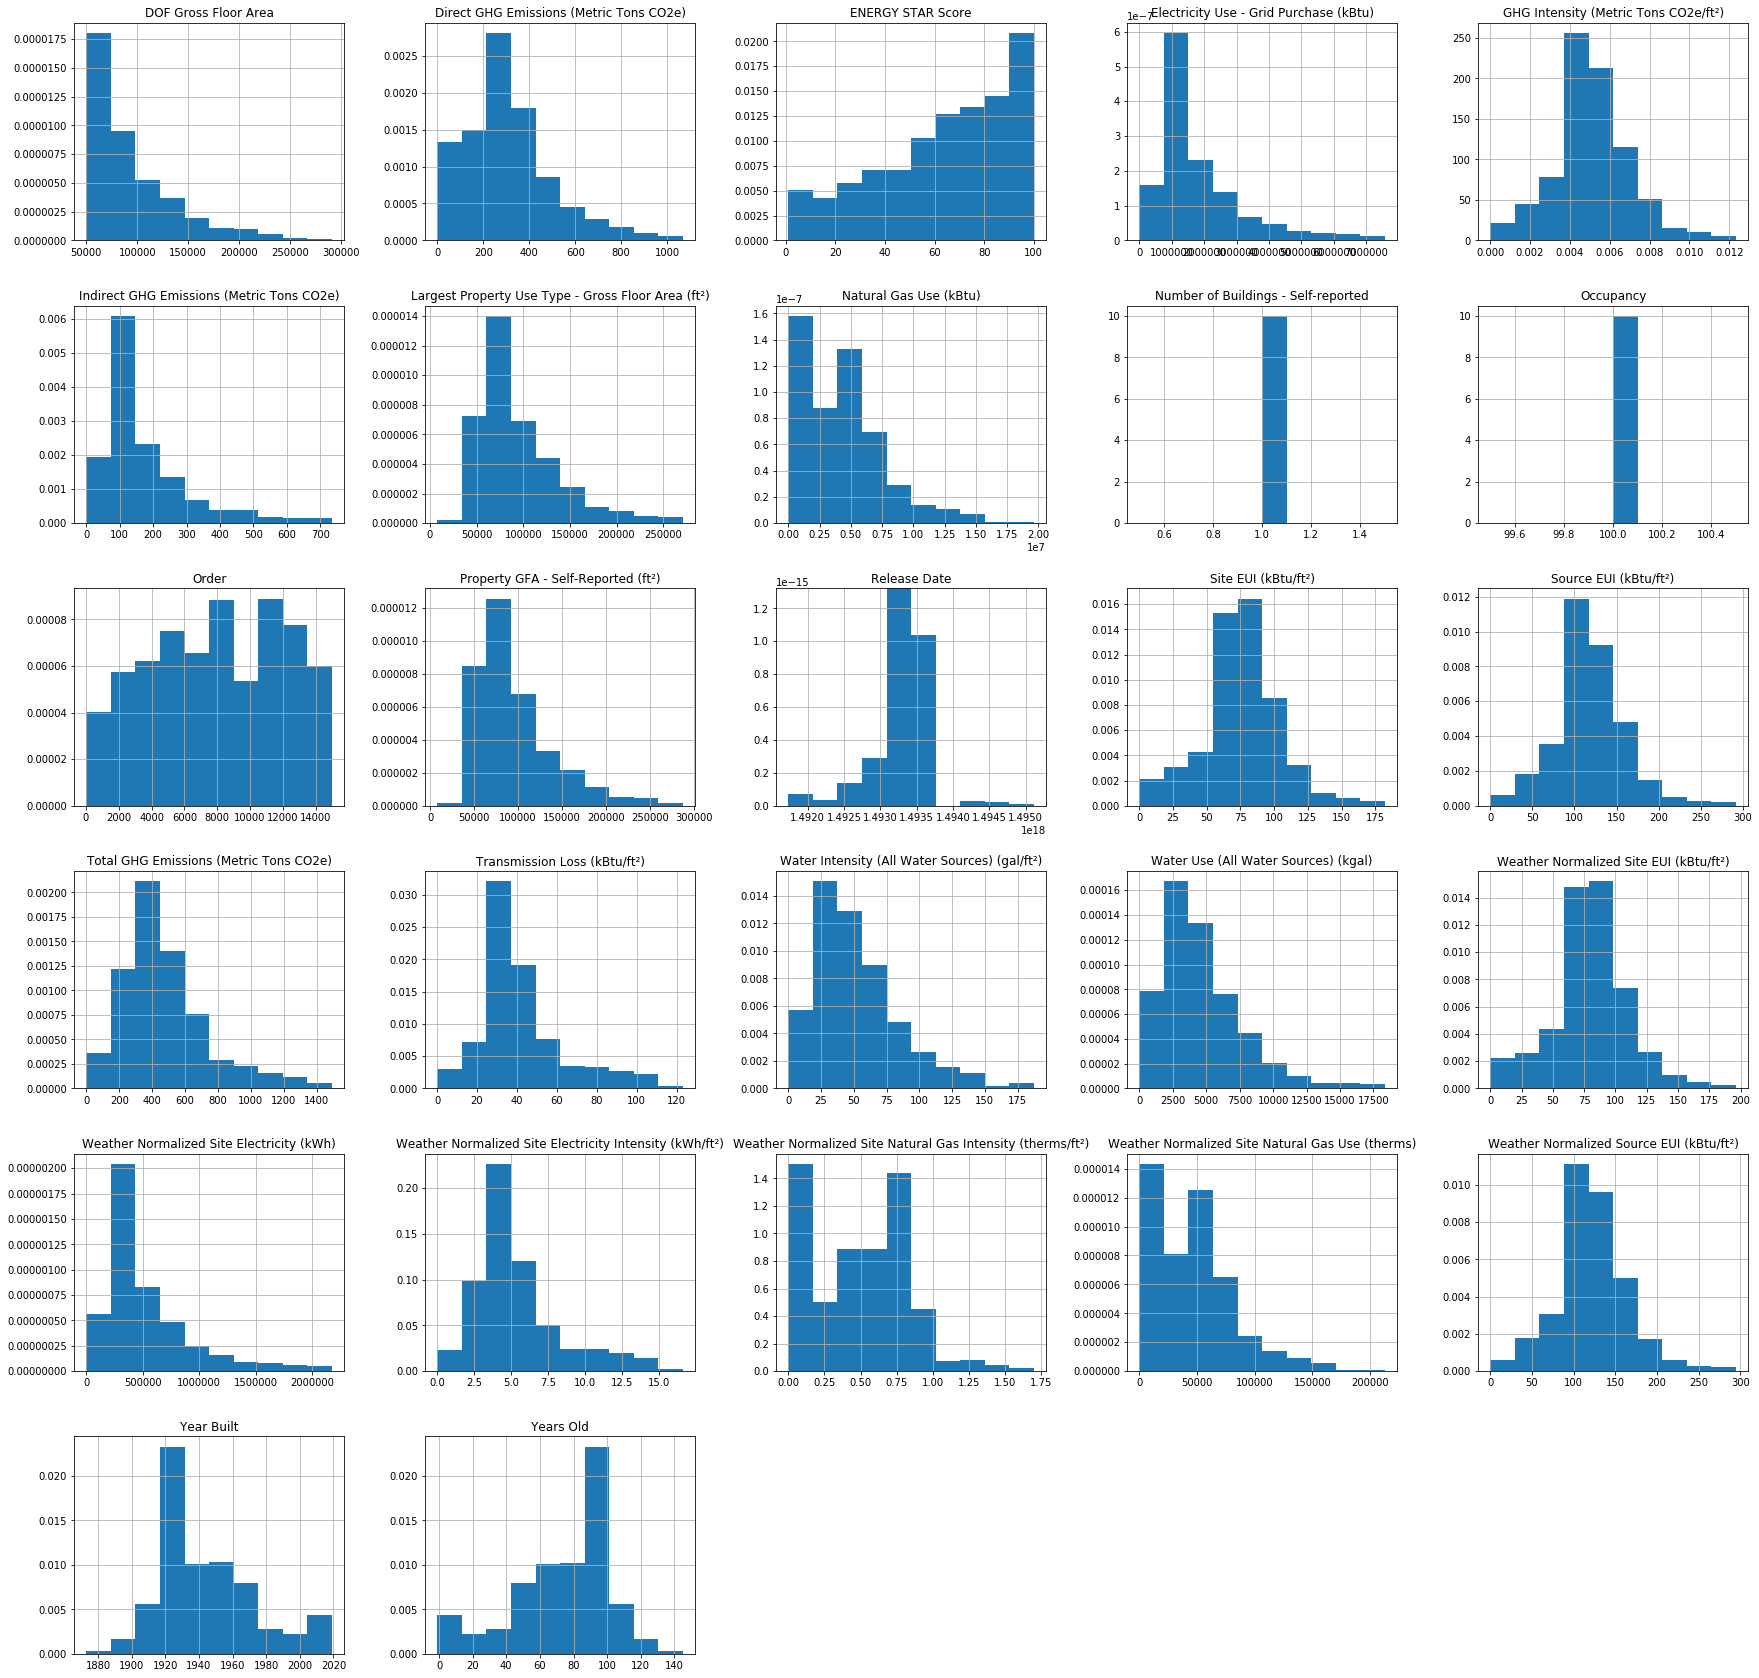

In [21]:
print_title('Histograms - before normalization')
hist = df_train.sample(1000).hist(figsize=(30, 30), density=True)
plt.show()

In [22]:
def pre_processing_normalize(df, exclude=[]):
    for col_name in df.select_dtypes(include=['number']):
        
        # Skip the excluded columns
        skip = False
        for string in exclude:
            if string in col_name:
                skip = True
                break
        if skip:
            continue
            
        col = df.loc[:, col_name]
        mean = col.mean()
        std = col.std()
        if std == 0:
            df[col_name] = col.apply(lambda x: (x-mean))
        else:
            df[col_name] = col.apply(lambda x: (x-mean)/std)
    return df


Histograms - after normalization
--------------------------------


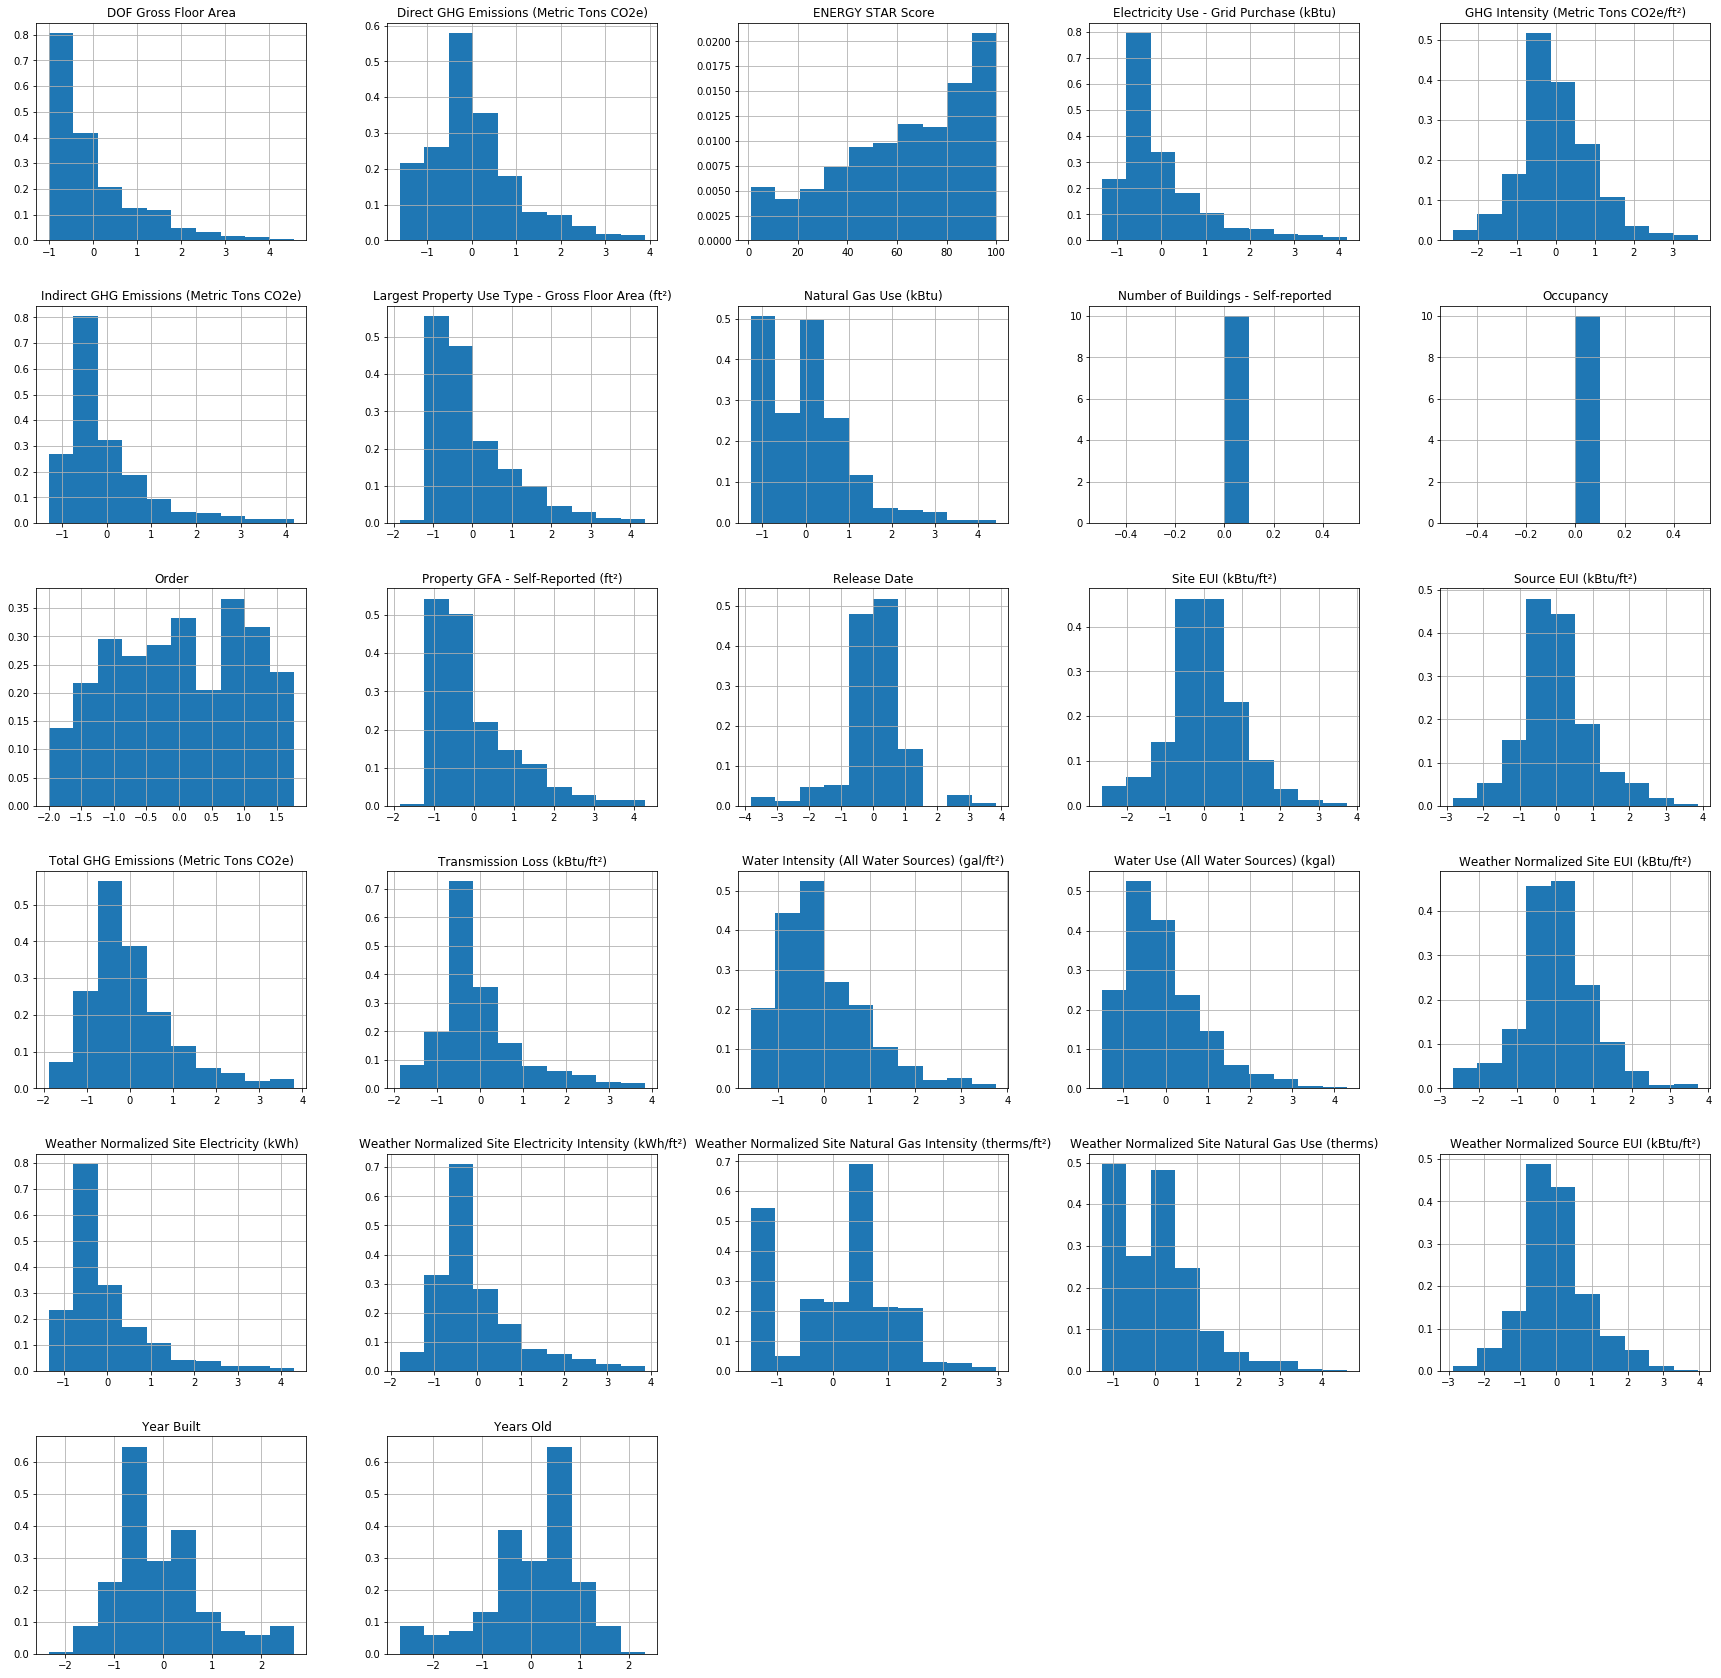

In [23]:
# Normalize
df_train_before_norm = df_train.copy() # Need to make a deep copy
df_train = pre_processing_normalize(df_train, exclude=['ENERGY STAR'])

print_title('Histograms - after normalization')
hist = df_train.sample(1000).hist(figsize=(30, 30), density=True)
plt.show()

In [24]:
import math

In [25]:
def pre_processing_log_normalize(df, exclude=[]):
    for col_name in df.select_dtypes(include='number'):
        
        # Skip the excluded columns
        skip = False
        for string in exclude:
            if string in col_name:
                skip = True
                break
        if skip:
            continue
            
        print_title(col_name)
        
        col = df.loc[:, col_name]
        
        # Histogram before
        hist = df.loc[:, col_name].sample(1000).hist(density=True, alpha = 0.5)
        
        # Normalize
        df[col_name] = df.loc[:, col_name].apply(lambda c: math.log(c, math.e) if c > 0 else c)
        
        # Histogram after
        hist = df.loc[:, col_name].sample(1000).hist(density=True, alpha = 0.5)
        plt.show()
        
    return df


DOF Gross Floor Area
--------------------


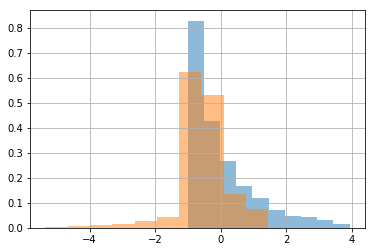


Largest Property Use Type - Gross Floor Area (ft²)
--------------------------------------------------


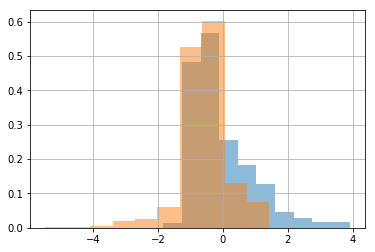


Year Built
----------


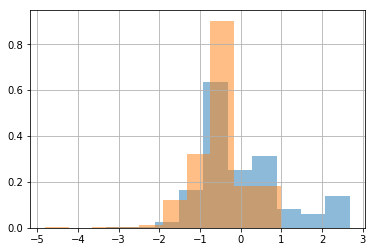


Number of Buildings - Self-reported
-----------------------------------


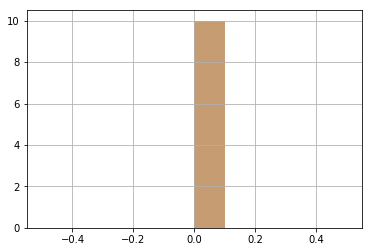


Occupancy
---------


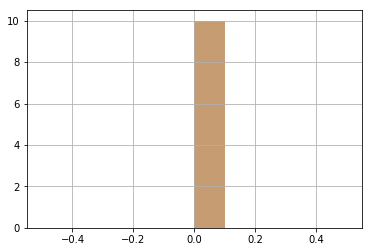


Weather Normalized Site Electricity Intensity (kWh/ft²)
-------------------------------------------------------


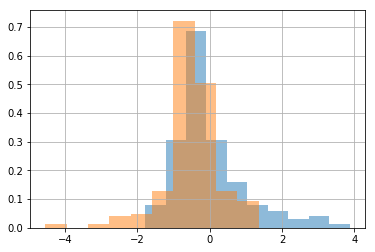


Weather Normalized Site Natural Gas Intensity (therms/ft²)
----------------------------------------------------------


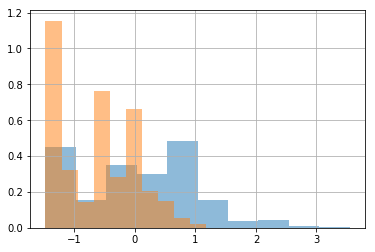


Natural Gas Use (kBtu)
----------------------


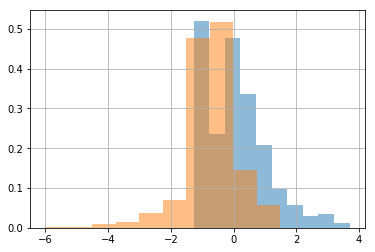


Weather Normalized Site Natural Gas Use (therms)
------------------------------------------------


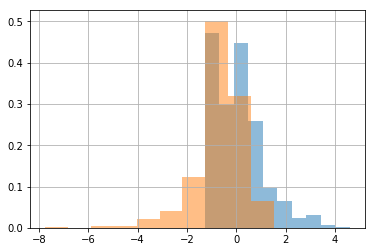


Electricity Use - Grid Purchase (kBtu)
--------------------------------------


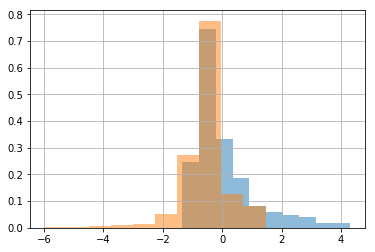


Weather Normalized Site Electricity (kWh)
-----------------------------------------


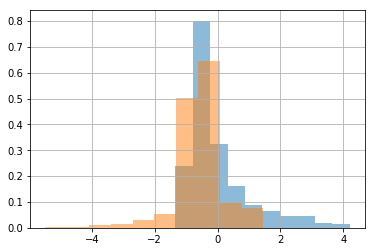


Total GHG Emissions (Metric Tons CO2e)
--------------------------------------


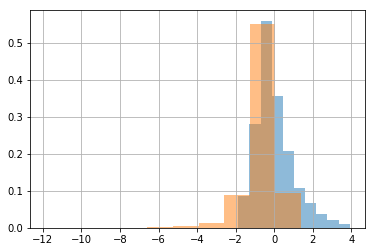


Direct GHG Emissions (Metric Tons CO2e)
---------------------------------------


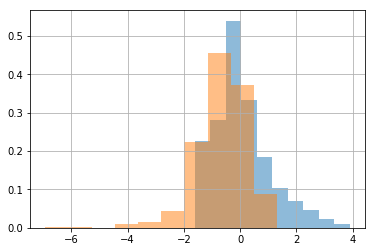


Indirect GHG Emissions (Metric Tons CO2e)
-----------------------------------------


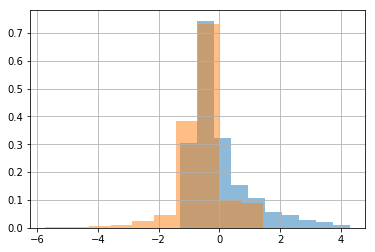


Property GFA - Self-Reported (ft²)
----------------------------------


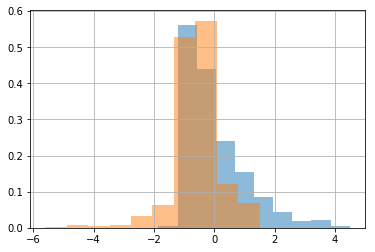


Water Use (All Water Sources) (kgal)
------------------------------------


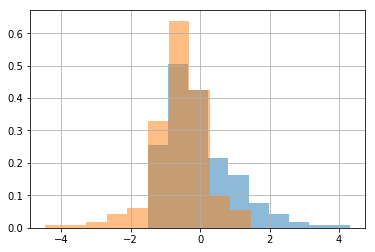


Water Intensity (All Water Sources) (gal/ft²)
---------------------------------------------


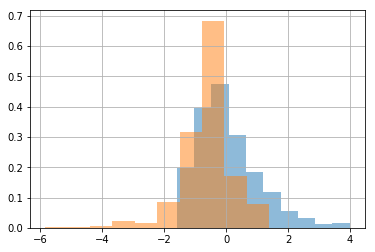


Release Date
------------


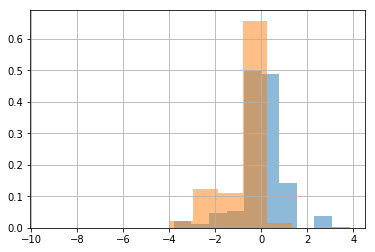


Transmission Loss (kBtu/ft²)
----------------------------


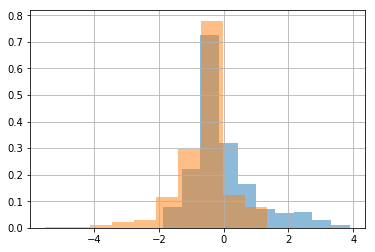


Years Old
---------


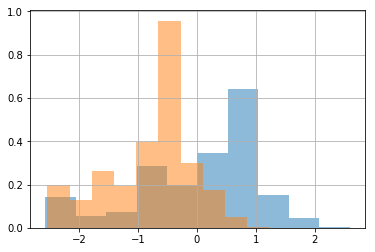

In [26]:
# Log normalize
df_train = pre_processing_log_normalize(df_train, exclude=['EUI', 'GHG Intensity', 'ENERGY STAR', 'Order'])

#### Imputation

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings(module='sklearn*', action='ignore', category=DeprecationWarning)

In [28]:
def pre_process_mean_median_impute(df, remove=False, flag=False):
    
    # Flag if desired
    if flag:
        df['imputed'] = 0
        df = df.astype({'imputed': 'int64'})

    # Remove rows that cannot be imputed
    if remove:
        df = df.loc[-df.select_dtypes(include=['object']).isna().any(axis=1), :]
        
    # It does not make sense to impute plain text (object) types,
    # as plain text does not have a finite number of instances
    perc_nan_col = calc_percent_nan_col(df.select_dtypes(exclude=['object']))

    # For each column that has missing values, impute them using median or mode
    for col_name in perc_nan_col[perc_nan_col > 0].index:
        
        # Get the data type of the column
        dtype = df.dtypes[col_name]
        
        # Get the column itself
        col = df.loc[:, col_name]
                
        # Get the y column itself
        col = df.loc[:, col_name]
        col_isna = col.isna()
        
        # If numeric, use the median
        if dtype == 'int64' or dtype == 'float64':
            col.fillna(col.median(), inplace=True)
            
        # Else, use the mode
        else:
            col.fillna(col.mode().iloc[0], inplace=True)
                
        # Flag if desired
        if flag:
            df.loc[col_isna, 'imputed'] = 1
    
    # Return the df
    return df

In [29]:
def pre_process_knn_impute(df, n_neighbors=5, weights='uniform', n_bins=12, remove=False, flag=False):
    
    # Flag if desired
    if flag:
        df['imputed'] = 0
        df = df.astype({'imputed': 'int64'})

    # Remove rows that cannot be imputed
    if remove:
        df = df.loc[-df.select_dtypes(include=['object']).isna().any(axis=1), :]
    
    # The classifier
    knn_classifier = KNeighborsClassifier(n_neighbors, weights=weights)
    
    # For each column that has missing values,
    # Train a KNN model to predict those missing values based on the data that is not missing
    perc_nan_col = calc_percent_nan_col(df)
    for col_name_y in perc_nan_col[perc_nan_col > 0].index:
                        
        # Get the y column itself
        print('Imputing ' + col_name_y + '...')
        col_y = df.loc[:, col_name_y]
        col_y_isna = col_y.isna()
        col_y_type = df.dtypes[col_name_y]
        
        # Unable to impute object types
        if col_y_type == 'object':
            continue
        
        # For referencing X columns
        col_name_X = df.columns != col_name_y
     
        # Train the model using data that is not missing
        
        # Prepare X
        knn_X = df.loc[:, col_name_X].select_dtypes(exclude='object') # Don't include objects
        knn_X = pre_process_mean_median_impute(knn_X) # Do some preliminary imputation
        knn_X = pd.get_dummies(knn_X) # Convert categorical columns to dummy numeric vars
        knn_train_X = knn_X.loc[-col_y_isna, :]
        knn_impute_X = knn_X.loc[col_y_isna, :]
        
        # Prepare y
        knn_train_y = df.loc[-col_y_isna, col_name_y]
        if col_y_type == 'float64' or col_y_type == 'int64': # ---------- Bin if continuous
            knn_train_y = pd.cut(knn_train_y, bins=n_bins)
        le_y = LabelEncoder().fit(knn_train_y)
        knn_train_y = le_y.transform(knn_train_y) # --------------------- Encode
        
        # Fit X -> y
        knn_classifier.fit(knn_train_X, knn_train_y)
        
        # Impute missing y <- X
        knn_impute_y = knn_classifier.predict(knn_impute_X)
        knn_impute_y = le_y.inverse_transform(knn_impute_y) # ----------- Decode
        if col_y_type == 'float64' or col_y_type == 'int64': # ---------- Reverse the bin if continous
            reverse_bin = np.vectorize(lambda y: (y.left + y.right) / 2)
            knn_impute_y = reverse_bin(knn_impute_y)        
        df.loc[col_y_isna, col_name_y] = knn_impute_y
        
        # Flag if desired
        if flag:
            df.loc[col_y_isna, 'imputed'] = 1

    # Return the df

    return df

In [30]:
# Percent missing values before imputation
print_title('Percent NaNs in each column - before pre-processing')
pprint_percent(calc_percent_nan_col(df_train))

# Impute using median (for numeric columns) and mode (for all others)
df_train_before_impute = df_train.copy()
df_train = pre_process_knn_impute(df_train, n_neighbors=7, weights='distance', n_bins=30, remove=True, flag=True)

# Percent missing values after imputation
print_title('Percent NaNs in each column - after pre-processing')
pprint_percent(calc_percent_nan_col(df_train))


Percent NaNs in each column - before pre-processing
---------------------------------------------------

Order                                                         0.00%
Property Id                                                   0.00%
Property Name                                                 0.00%
Parent Property Id                                            0.00%
Parent Property Name                                          0.00%
BBL - 10 digits                                               0.00%
NYC Borough, Block and Lot (BBL) self-reported                0.00%
NYC Building Identification Number (BIN)                      0.84%
Address 1 (self-reported)                                     0.00%
Postal Code                                                   0.00%
Street Number                                                 0.27%
Street Name                                                   0.21%
Borough                                                       0.21%
DOF Gross 

#### Colinearity

In [31]:
# Seaborn visualization library
import seaborn as sns
warnings.filterwarnings(module='scipy*', action='ignore', category=FutureWarning)

In [32]:
def sample_pair_plot(df):
    
    # EUI-related features
    g = sns.pairplot(df.sample(1000), 
                 vars=['ENERGY STAR Score',
                       'Site EUI (kBtu/ft²)',
                       'Source EUI (kBtu/ft²)',
                       'Transmission Loss (kBtu/ft²)',
                       'Weather Normalized Site EUI (kBtu/ft²)',
                       'Weather Normalized Source EUI (kBtu/ft²)'], height=3, hue='imputed')
    plt.show()


Pair plot - imputation done right
---------------------------------


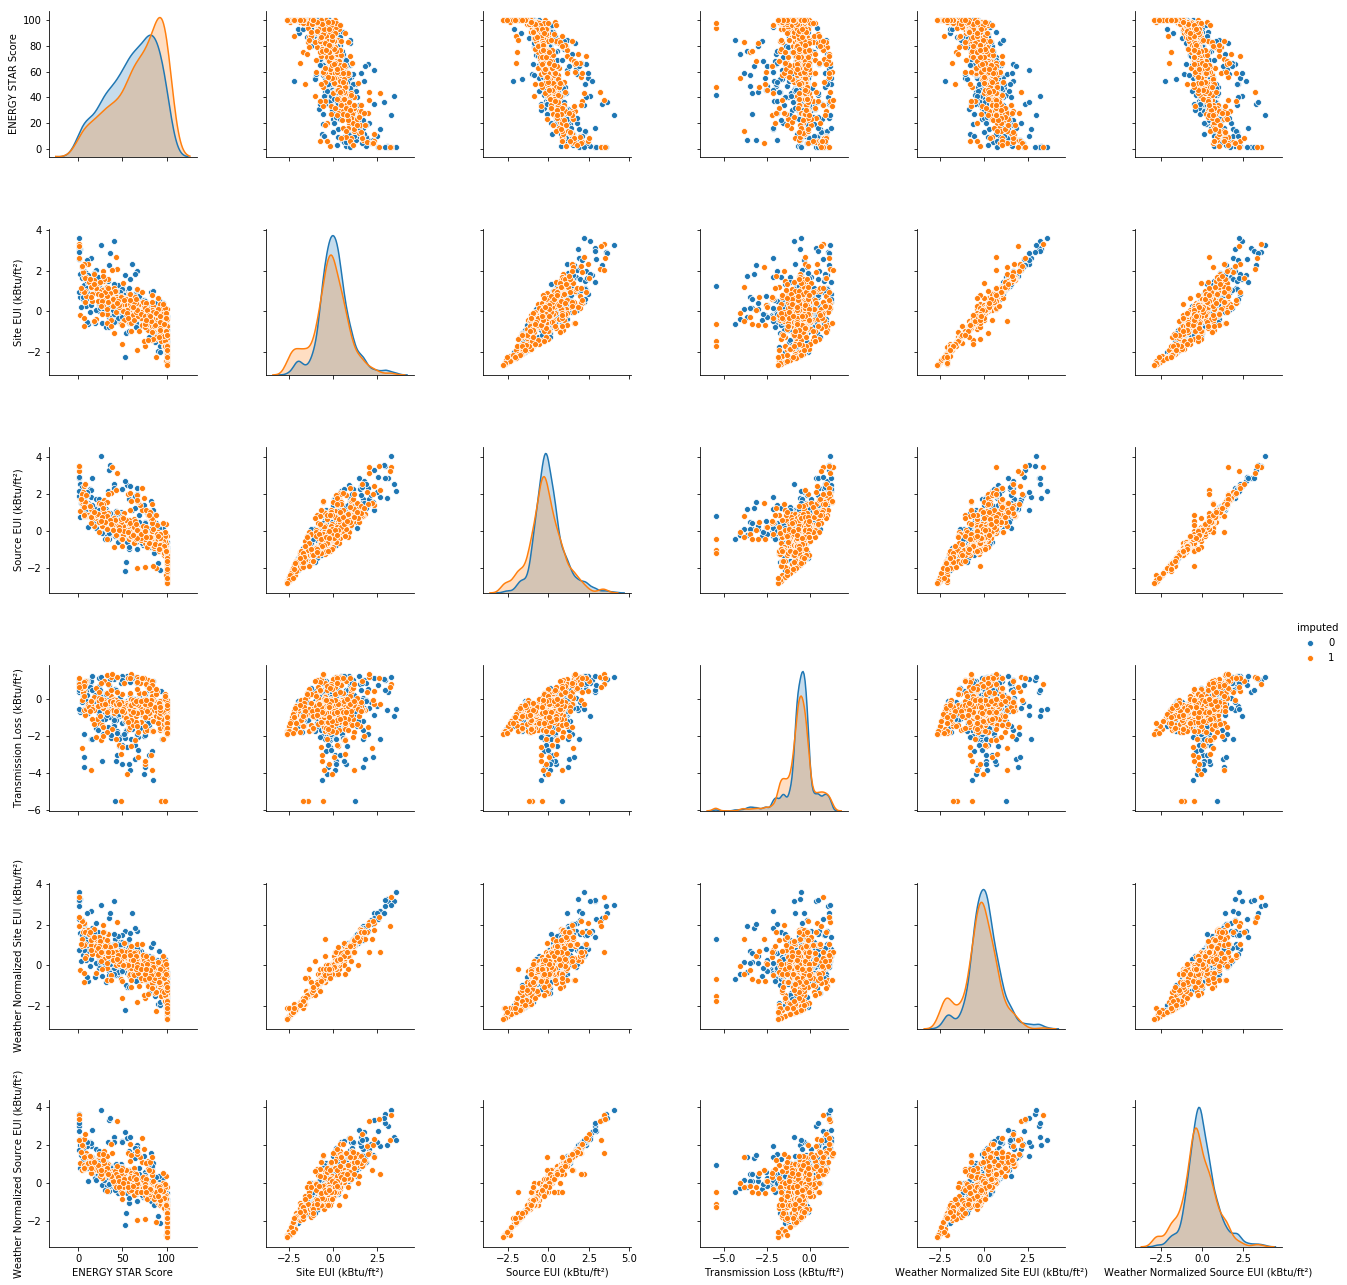


Pair plot - imputation done without normalization
-------------------------------------------------
Imputing Weather Normalized Site EUI (kBtu/ft²)...
Imputing Weather Normalized Site Electricity Intensity (kWh/ft²)...
Imputing Weather Normalized Site Natural Gas Intensity (therms/ft²)...
Imputing Weather Normalized Source EUI (kBtu/ft²)...
Imputing Natural Gas Use (kBtu)...
Imputing Weather Normalized Site Natural Gas Use (therms)...
Imputing Electricity Use - Grid Purchase (kBtu)...
Imputing Weather Normalized Site Electricity (kWh)...
Imputing Direct GHG Emissions (Metric Tons CO2e)...
Imputing Indirect GHG Emissions (Metric Tons CO2e)...
Imputing Water Use (All Water Sources) (kgal)...
Imputing Water Intensity (All Water Sources) (gal/ft²)...
Imputing Water Required?...
Imputing DOF Benchmarking Submission Status...


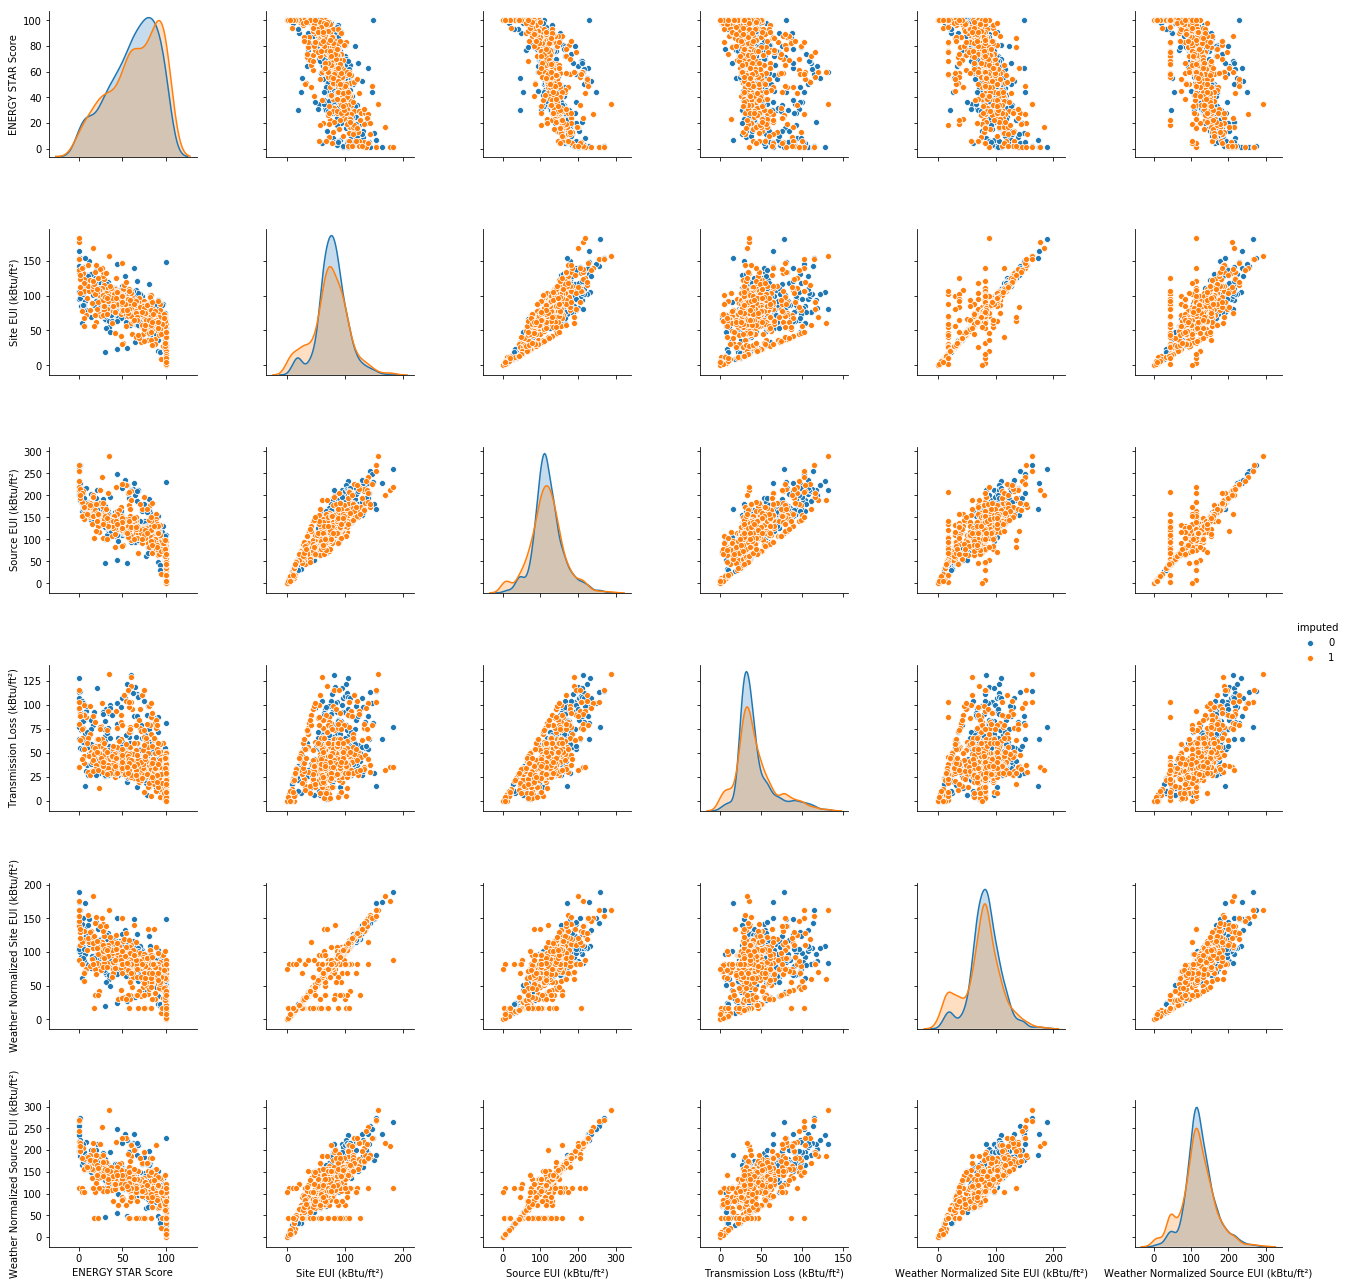


Pair plot - mean median imputation
----------------------------------


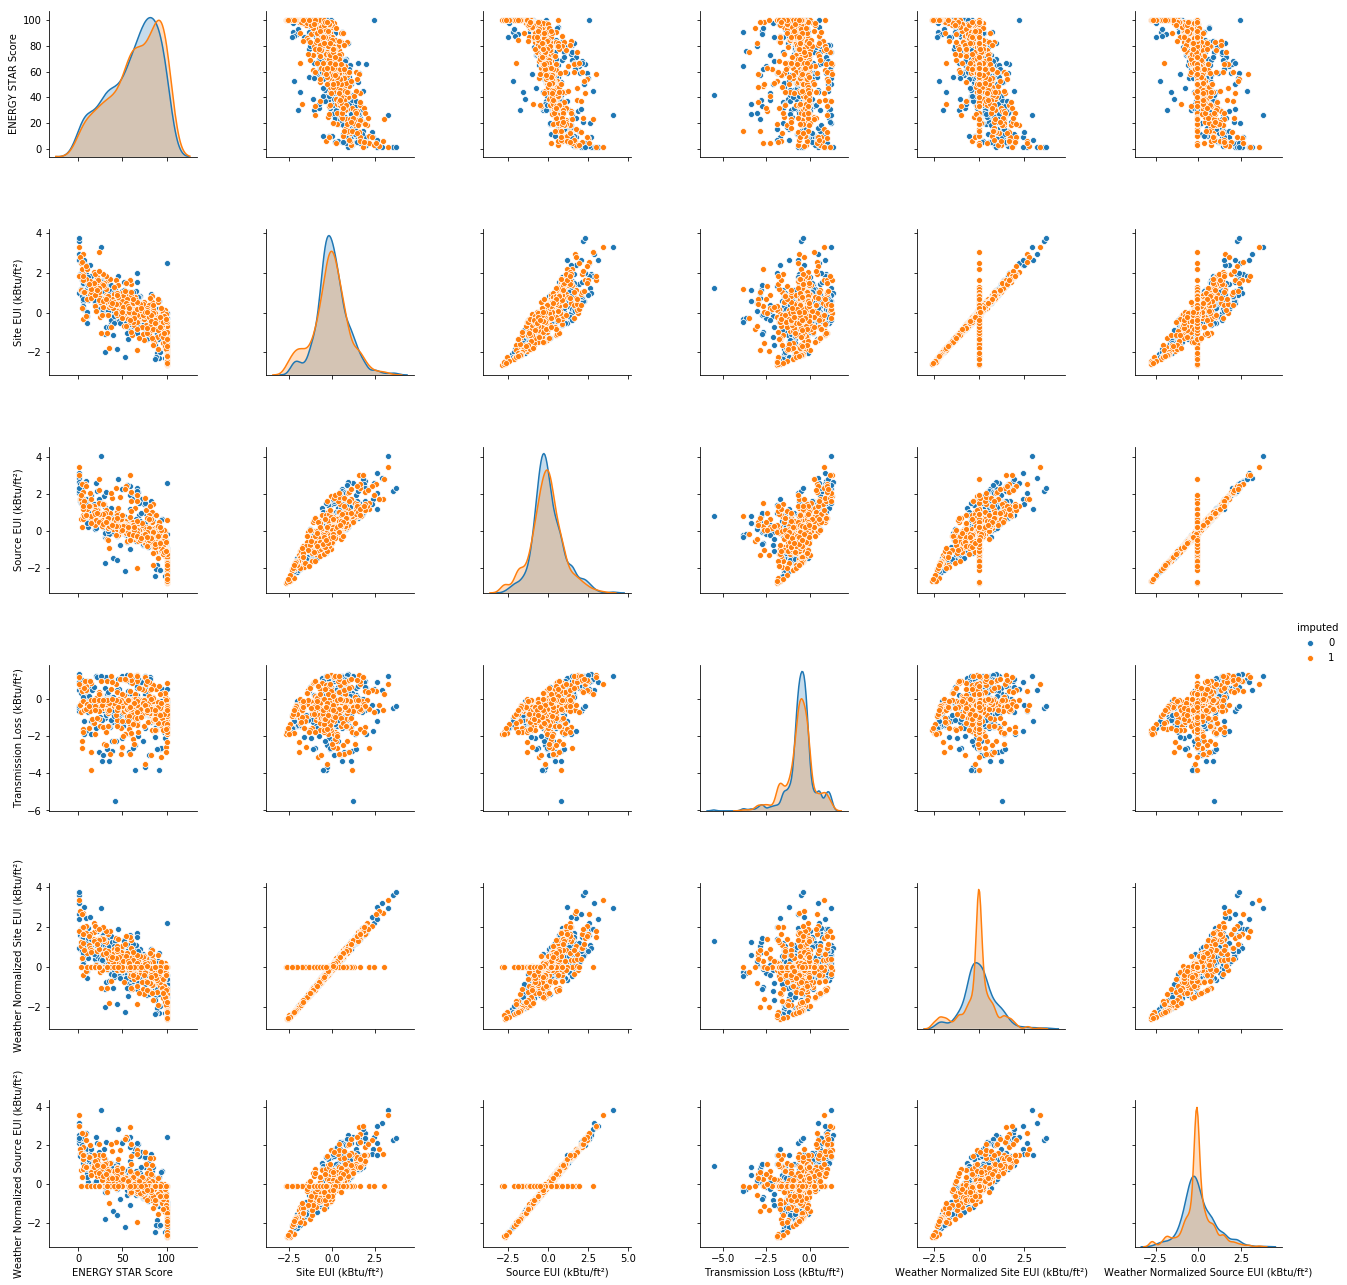

In [33]:
# The result of imputation
print_title('Pair plot - imputation done right')
sample_pair_plot(df_train)

# What happens when you impute without normalization
print_title('Pair plot - imputation done without normalization')
sample_pair_plot(pre_process_knn_impute(df_train_before_norm,
                                        n_neighbors=7, 
                                        weights='distance', 
                                        n_bins=30, 
                                        remove=True, 
                                        flag=True))

# Mean / median imputation
print_title('Pair plot - mean median imputation')
sample_pair_plot(pre_process_mean_median_impute(df_train_before_impute,
                                        remove=True, 
                                        flag=True))


Pair plot - EUI features
------------------------


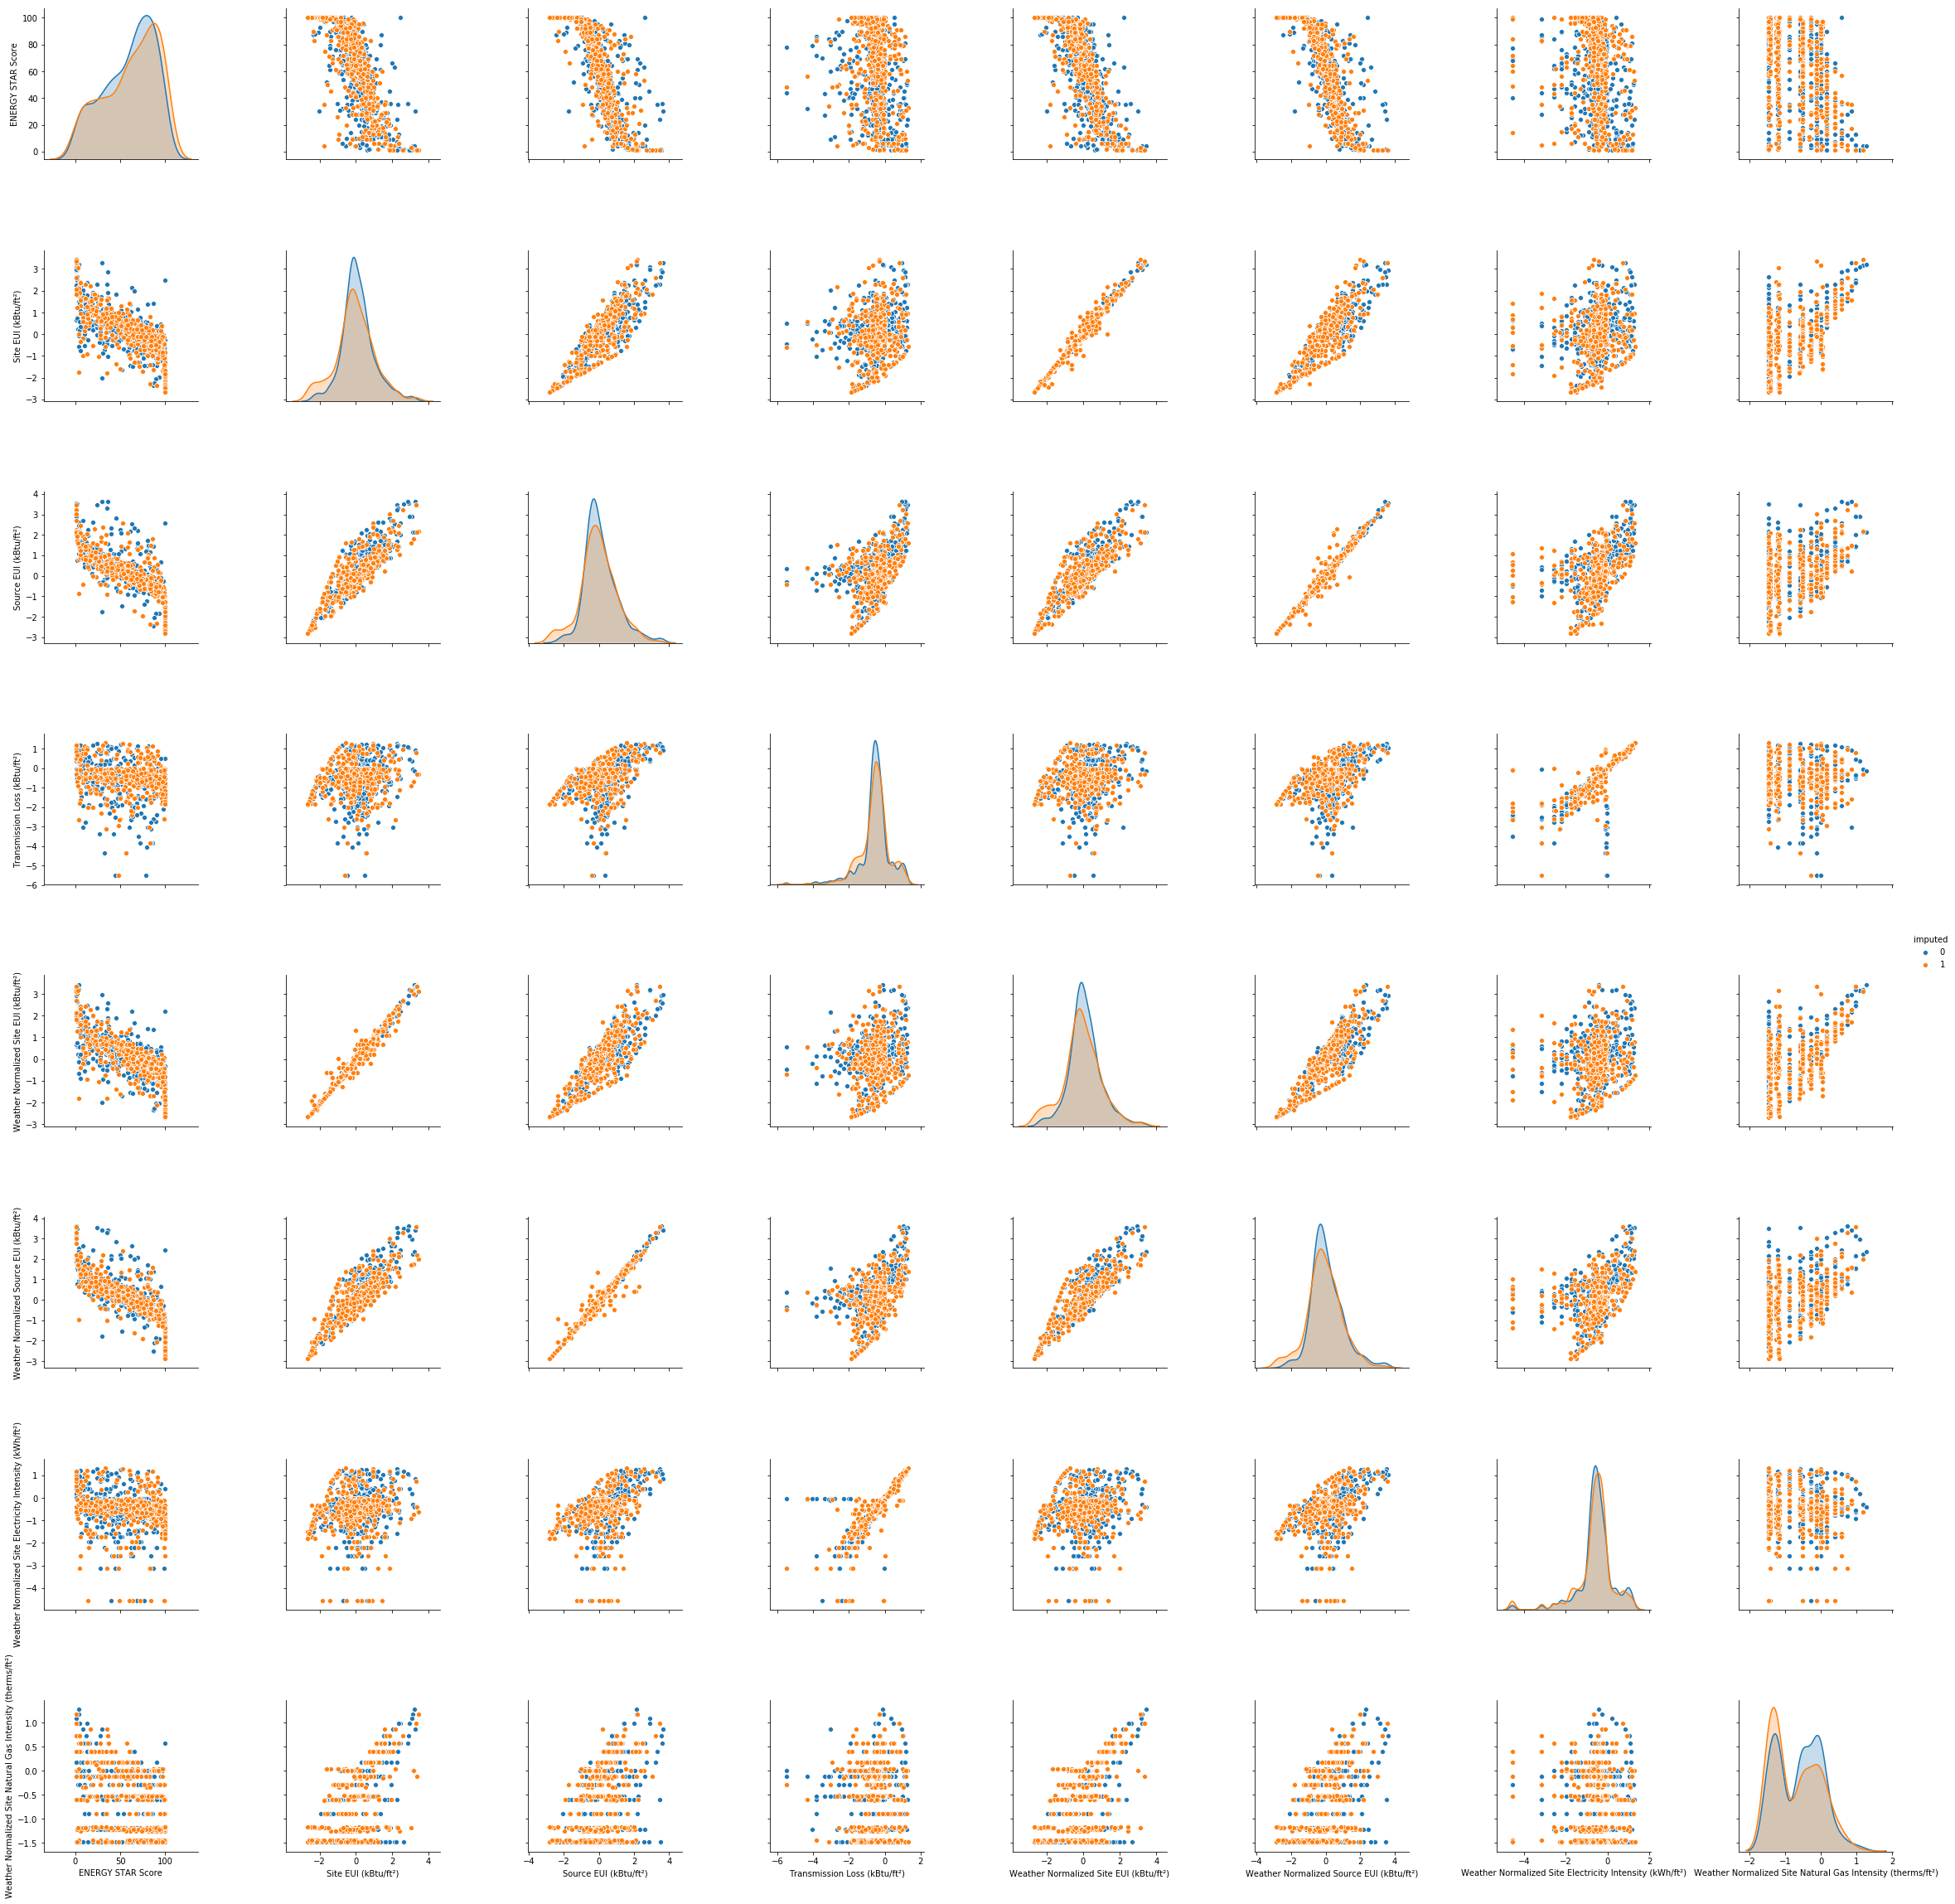


Pair plot - energy features
---------------------------


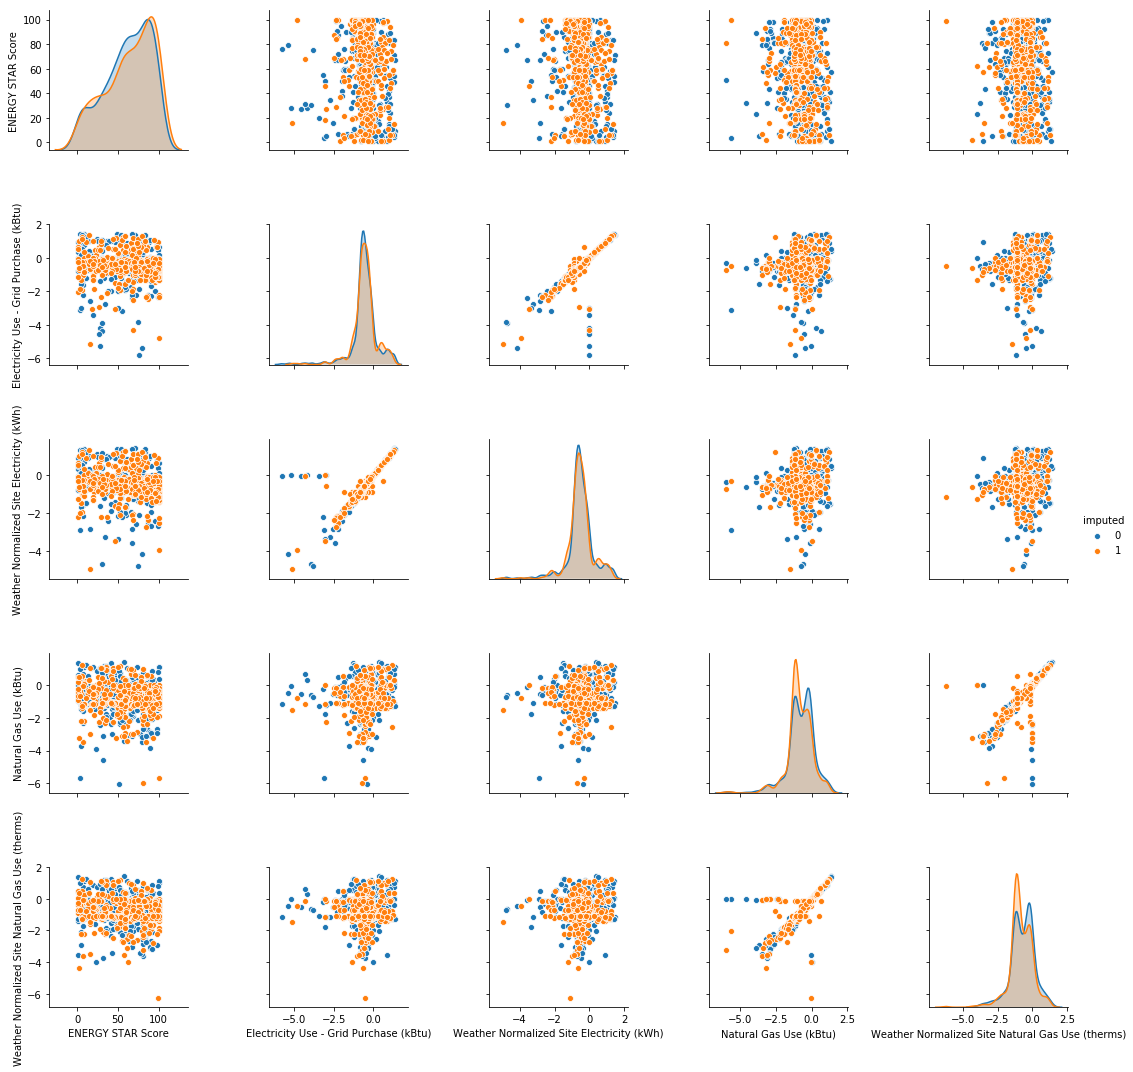


Pair plot - floor-area features
-------------------------------


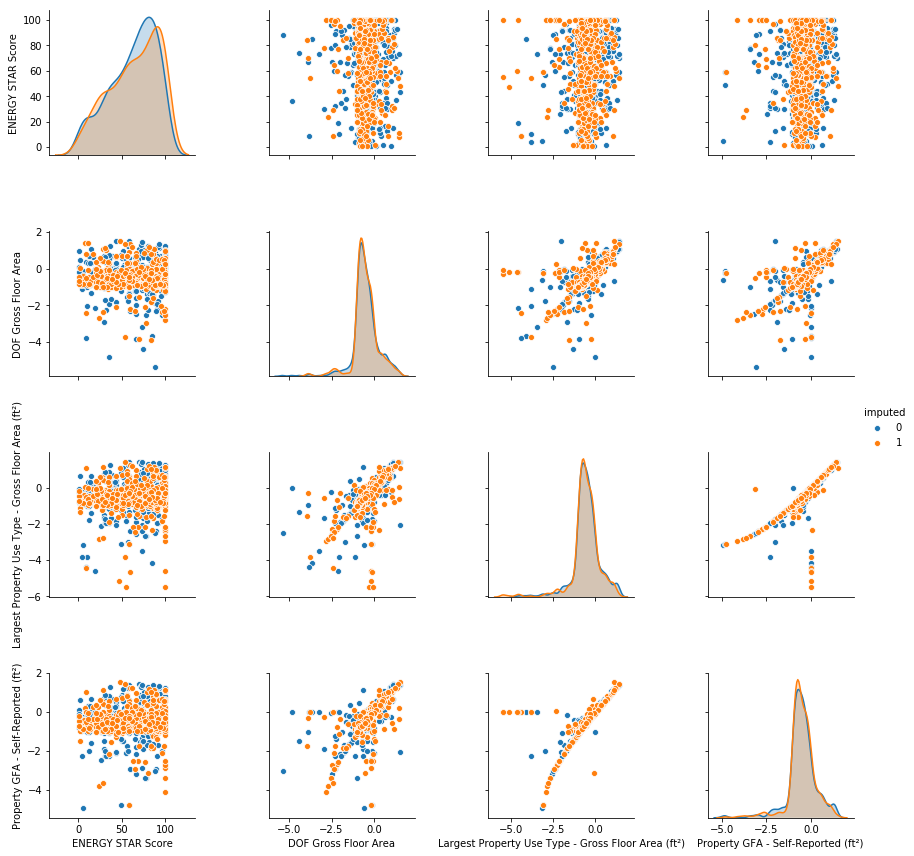


Pair plot - greenhouse-gas features
-----------------------------------


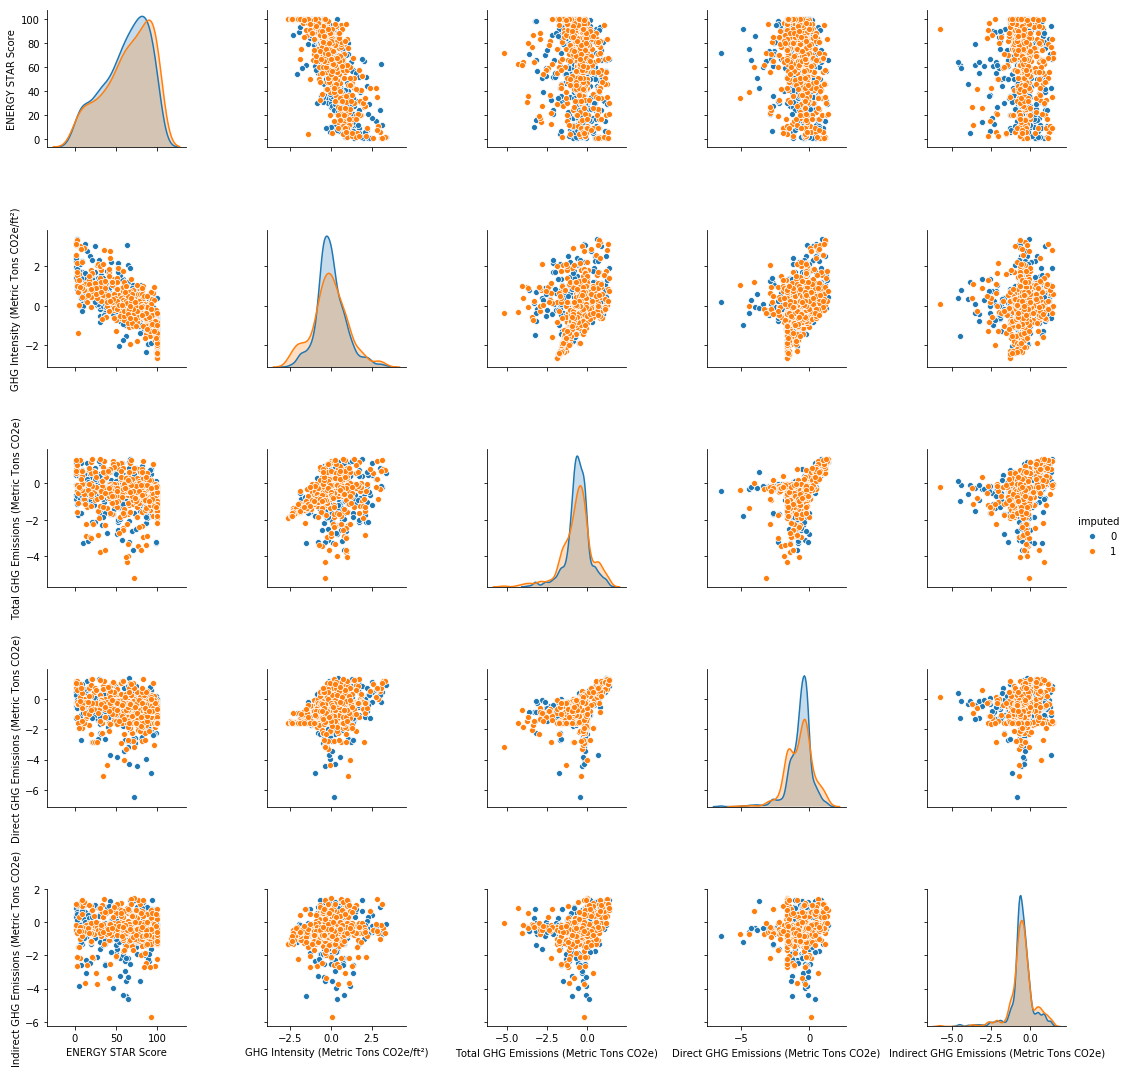

In [34]:
# EUI features
print_title('Pair plot - EUI features')
g = sns.pairplot(df_train.sample(1000), 
                 vars=['ENERGY STAR Score',
                       'Site EUI (kBtu/ft²)',
                       'Source EUI (kBtu/ft²)',
                       'Transmission Loss (kBtu/ft²)',
                       'Weather Normalized Site EUI (kBtu/ft²)',
                       'Weather Normalized Source EUI (kBtu/ft²)',
                       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
                       'Weather Normalized Site Natural Gas Intensity (therms/ft²)'], height=4, hue='imputed')
plt.show()

# Energy features
print_title('Pair plot - energy features')
g = sns.pairplot(df_train.sample(1000), 
                 vars=['ENERGY STAR Score',
                       'Electricity Use - Grid Purchase (kBtu)',
                       'Weather Normalized Site Electricity (kWh)',
                       'Natural Gas Use (kBtu)',
                       'Weather Normalized Site Natural Gas Use (therms)'], height=3, hue='imputed')
plt.show()

# Floor-area features
print_title('Pair plot - floor-area features')
g = sns.pairplot(df_train.sample(1000), 
                 vars=['ENERGY STAR Score',
                       'DOF Gross Floor Area',
                       'Largest Property Use Type - Gross Floor Area (ft²)',
                       'Property GFA - Self-Reported (ft²)'], height=3, hue='imputed')
plt.show()

# Greenhouse-gas features
print_title('Pair plot - greenhouse-gas features')
g = sns.pairplot(df_train.sample(1000), 
                 vars=['ENERGY STAR Score',
                       'GHG Intensity (Metric Tons CO2e/ft²)',
                       'Total GHG Emissions (Metric Tons CO2e)',
                       'Direct GHG Emissions (Metric Tons CO2e)',
                       'Indirect GHG Emissions (Metric Tons CO2e)'], height=3, hue='imputed')
plt.show()

#### Feature Reduction

##### Numeric

There are several colinear features revealed by the pair plots. Selecting one from each set of colinear features:

EUI features:
```
Transmission Loss (kBtu/ft²)
Weather Normalized Source EUI (kBtu/ft²)
Weather Normalized Site Electricity Intensity (kWh/ft²)
Weather Normalized Site Natural Gas Intensity (therms/ft²)
```
Energy features:
```
Weather Normalized Site Electricity (kWh)
Weather Normalized Site Natural Gas Use (therms)
```
Floor-area features:
```
Property GFA - Self-Reported (ft²)
```
Greenhouse-gas features:
```
GHG Intensity (Metric Tons CO2e/ft²) 
Total GHG Emissions (Metric Tons CO2e)
```
Other features:
```
Years Old
```

##### Categorical

In [35]:
# Take a look at our categorical variables
df_train.select_dtypes(include=['category']).head()

Borough Primary Property Type - Self Selected  \
7661    Brooklyn                   Multifamily Housing   
10210     Queens                   Multifamily Housing   
4249   Manhattan                   Multifamily Housing   
6392       Bronx                   Multifamily Housing   
8905    Brooklyn                   Multifamily Housing   

      Largest Property Use Type Metered Areas (Energy) Water Required?  \
7661        Multifamily Housing         Whole Building             Yes   
10210       Multifamily Housing         Whole Building             Yes   
4249        Multifamily Housing         Whole Building              No   
6392        Multifamily Housing         Whole Building             Yes   
8905        Multifamily Housing         Whole Building             Yes   

      DOF Benchmarking Submission Status  
7661                       In Compliance  
10210                      In Compliance  
4249                       In Compliance  
6392                       In Compliance  
8905                       In Compliance

In [83]:
def pre_process_categorical(df, p=0.05):
    for col_name in df.select_dtypes(include=['category']):
        counts = df.loc[:, col_name].value_counts()
        to_remove = counts[counts < (len(df) * p)].index
        if 'Other' not in df[col_name].cat.categories:
            df[col_name].cat.add_categories('Other', inplace=True)
        df.loc[df[col_name].isin(to_remove), col_name] = 'Other'
        df[col_name].cat.remove_unused_categories(inplace=True)
        ax = counts.plot(kind='barh', color='#5487d8', figsize=(10, len(counts) / 5))

    return df

In [61]:
# Remove very small frequency values
df_train = pre_process_categorical(df_train)


Borough
-------


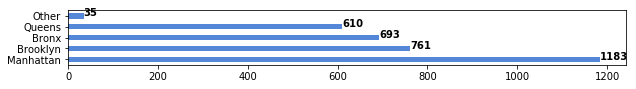


Primary Property Type - Self Selected
-------------------------------------


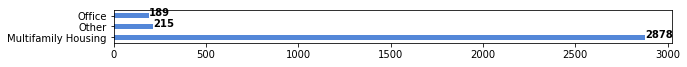


Largest Property Use Type
-------------------------


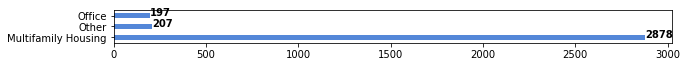


Metered Areas (Energy)
----------------------


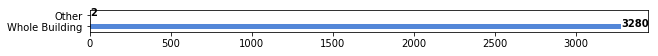


Water Required?
---------------


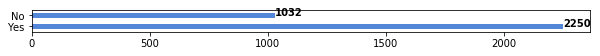


DOF Benchmarking Submission Status
----------------------------------


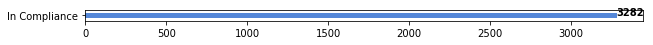

In [38]:
for col_name in df_train.select_dtypes(include=['category']):
    print_title(col_name)
    counts = df_train.loc[:, col_name].value_counts()
    counts = counts[counts > 0]
    ax = counts.plot(kind='barh', color='#5487d8', figsize=(10, len(counts) / 5))
    for i, v in enumerate(counts):
        ax.text(v, i, str(v), color='black', fontweight='bold')
    plt.show()

The following categorical features can be removed due to imbalances between the categories:
```
DOF Benchmarking Submission Status
Metered Areas (Energy)
```

This leaves the following columns:
```
Borough
Primary Property Type - Self Selected
Largest Property Use Type
Water Required?
```

In [39]:
# df_train = df_train_before_reduction

In [40]:
def pre_process_reduce_features(df):
    keep = ['Transmission Loss (kBtu/ft²)', # ---------------------------------------- Numeric features
            'Weather Normalized Source EUI (kBtu/ft²)',
            'Weather Normalized Site Electricity Intensity (kWh/ft²)',
            'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
            'Weather Normalized Site Electricity (kWh)',
            'Weather Normalized Site Natural Gas Use (therms)',
            'Property GFA - Self-Reported (ft²)',
            'GHG Intensity (Metric Tons CO2e/ft²)',
            'Total GHG Emissions (Metric Tons CO2e)',
            'Years Old',
            'Borough', # ---------------------------------------------------- Categorical features
            'Primary Property Type - Self Selected',
            'Largest Property Use Type',
            'Water Required?',
            'ENERGY STAR Score'] # ------------------------------------------ Target
    return df.loc[:, keep]

In [41]:
df_train_before_reduction = df_train.copy() # Need to make a deep copy
print_title('Data frame - after feature reduction')
df_train = pre_process_reduce_features(df_train)
df_train.head()


Data frame - after feature reduction
------------------------------------


Transmission Loss (kBtu/ft²)  Weather Normalized Source EUI (kBtu/ft²)  \
7661                      -0.391470                                 -0.256500   
10210                     -0.444209                                 -0.468702   
4249                      -1.557630                                 -0.322022   
6392                      -0.615611                                 -0.298740   
8905                      -0.791408                                 -0.885457   

       Weather Normalized Site Electricity Intensity (kWh/ft²)  \
7661                                           -0.480441         
10210                                          -0.513174         
4249                                           -1.575323         
6392                                           -0.611371         
8905                                           -0.840499         

       Weather Normalized Site Natural Gas Intensity (therms/ft²)  \
7661                                           -0.525098            
10210                                          -1.218763            
4249                                           -0.296208            
6392                                           -0.888011            
8905                                           -0.000306            

       Weather Normalized Site Electricity (kWh)  \
7661                                   -0.757216   
10210                                  -0.653174   
4249                                    0.471048   
6392                                   -0.732826   
8905                                   -0.498036   

       Weather Normalized Site Natural Gas Use (therms)  \
7661                                          -0.105666   
10210                                         -0.166874   
4249                                          -0.044231   
6392                                          -0.850077   
8905                                          -1.714135   

       Property GFA - Self-Reported (ft²)  \
7661                            -0.881080   
10210                           -0.617652   
4249                             0.799841   
6392                            -0.660526   
8905                            -0.887986   

       GHG Intensity (Metric Tons CO2e/ft²)  \
7661                              -0.061005   
10210                             -0.490273   
4249                              -0.574868   
6392                               0.232214   
8905                              -0.755508   

       Total GHG Emissions (Metric Tons CO2e)  Years Old    Borough  \
7661                                -0.742217  -0.444869   Brooklyn   
10210                               -0.746516  -0.585233     Queens   
4249                                 0.126663  -0.390127  Manhattan   
6392                                -0.404523  -0.390127      Bronx   
8905                                -0.250528  -0.909800   Brooklyn   

      Primary Property Type - Self Selected Largest Property Use Type  \
7661                    Multifamily Housing       Multifamily Housing   
10210                   Multifamily Housing       Multifamily Housing   
4249                    Multifamily Housing       Multifamily Housing   
6392                    Multifamily Housing       Multifamily Housing   
8905                    Multifamily Housing       Multifamily Housing   

      Water Required?  ENERGY STAR Score  
7661              Yes               78.0  
10210             Yes               89.0  
4249               No               75.0  
6392              Yes               78.0  
8905              Yes               92.0

<a id='analyze-modeling-and-evaluation'></a>

### Modeling and Evaluation

In [88]:
# Putting all the steps taken together
def prepare_data(df):
    
    # Cleaning
    df = clean_missing_value_text(df, text='Not Available')
    df = clean_col_types(df)
    df = df.loc[-df.loc[:, 'ENERGY STAR Score'].isna(), :]
    df = clean_missing_values(df)
    df = clean_outliers(df)
    
    # Feature engineering
    df['Transmission Loss (kBtu/ft²)'] = df.loc[:, 'Source EUI (kBtu/ft²)'] - df.loc[:, 'Site EUI (kBtu/ft²)']
    df['GHG Intensity (Metric Tons CO2e/ft²)'] = df.loc[:, 'Total GHG Emissions (Metric Tons CO2e)'] / df.loc[:, 'Property GFA - Self-Reported (ft²)']
    df['Years Old'] = 2018 - df.loc[:, 'Year Built']
    df = clean_outliers(df)
    
    # Pre-processing
    df = pre_processing_normalize(df, exclude=['ENERGY STAR'])
    df = pre_processing_log_normalize(df, exclude=['EUI', 'GHG Intensity', 'ENERGY STAR', 'Order'])
    df = pre_process_knn_impute(df, n_neighbors=7, weights='distance', n_bins=30, remove=True, flag=True)
    df = pre_process_categorical(df)
    df = pre_process_reduce_features(df)
    
    return df


DOF Gross Floor Area
--------------------


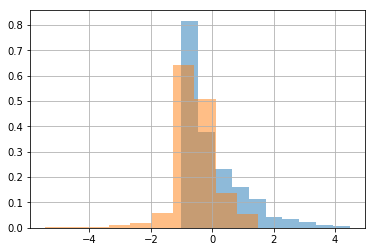


Largest Property Use Type - Gross Floor Area (ft²)
--------------------------------------------------


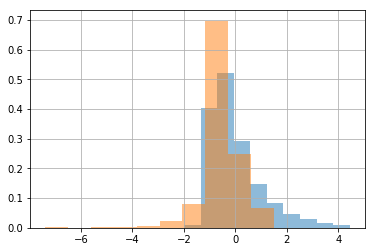


Year Built
----------


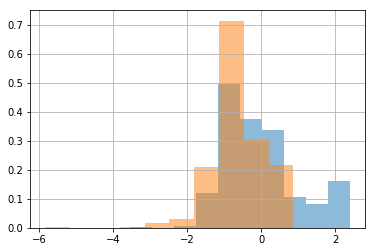


Number of Buildings - Self-reported
-----------------------------------


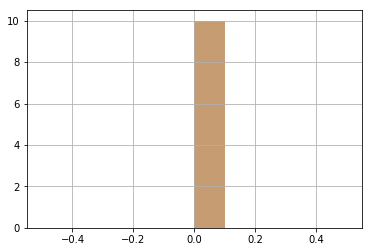


Occupancy
---------


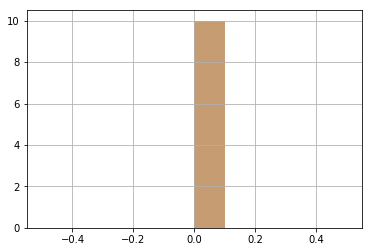


Weather Normalized Site Electricity Intensity (kWh/ft²)
-------------------------------------------------------


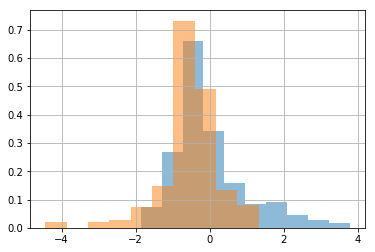


Weather Normalized Site Natural Gas Intensity (therms/ft²)
----------------------------------------------------------


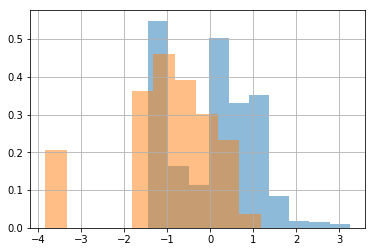


Natural Gas Use (kBtu)
----------------------


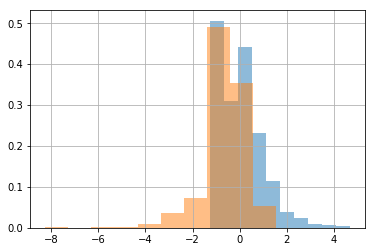


Weather Normalized Site Natural Gas Use (therms)
------------------------------------------------


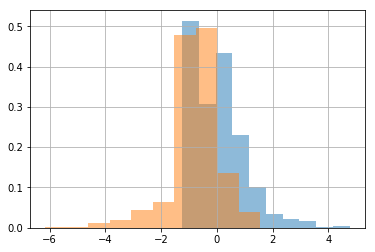


Electricity Use - Grid Purchase (kBtu)
--------------------------------------


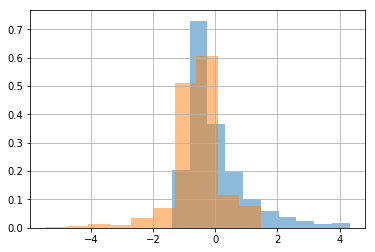


Weather Normalized Site Electricity (kWh)
-----------------------------------------


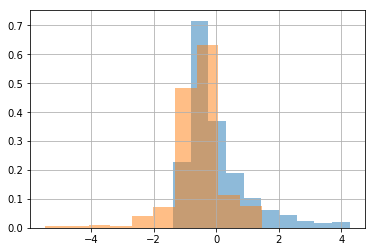


Total GHG Emissions (Metric Tons CO2e)
--------------------------------------


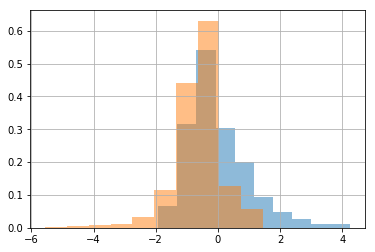


Direct GHG Emissions (Metric Tons CO2e)
---------------------------------------


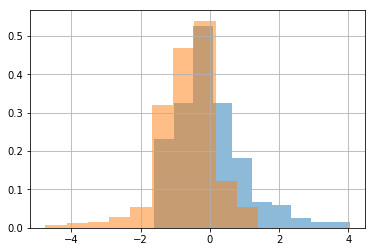


Indirect GHG Emissions (Metric Tons CO2e)
-----------------------------------------


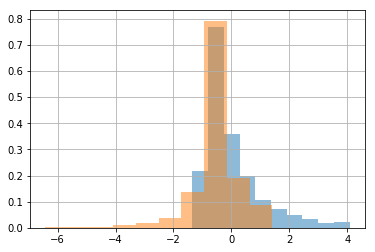


Property GFA - Self-Reported (ft²)
----------------------------------


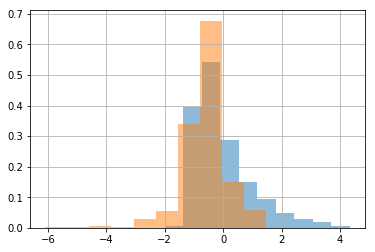


Water Use (All Water Sources) (kgal)
------------------------------------


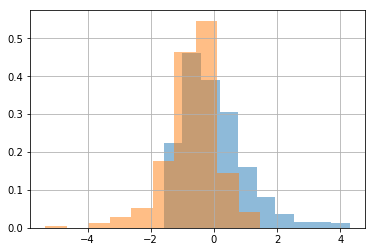


Water Intensity (All Water Sources) (gal/ft²)
---------------------------------------------


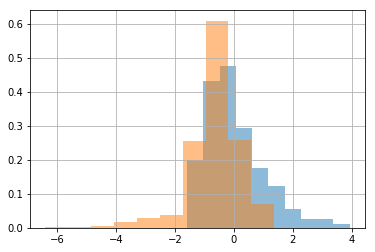


Release Date
------------


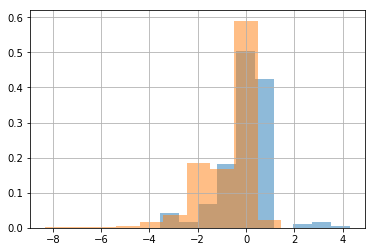


Transmission Loss (kBtu/ft²)
----------------------------


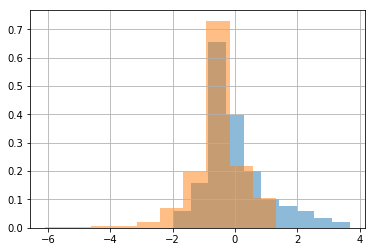


Years Old
---------


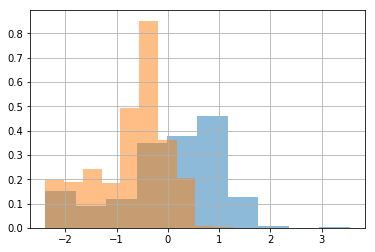

Imputing Weather Normalized Site EUI (kBtu/ft²)...
Imputing Weather Normalized Site Electricity Intensity (kWh/ft²)...
Imputing Weather Normalized Site Natural Gas Intensity (therms/ft²)...
Imputing Weather Normalized Source EUI (kBtu/ft²)...
Imputing Natural Gas Use (kBtu)...
Imputing Weather Normalized Site Natural Gas Use (therms)...
Imputing Electricity Use - Grid Purchase (kBtu)...
Imputing Weather Normalized Site Electricity (kWh)...
Imputing Water Use (All Water Sources) (kgal)...
Imputing Water Intensity (All Water Sources) (gal/ft²)...
Imputing Water Required?...
Imputing DOF Benchmarking Submission Status...


In [43]:
# Apply all the steps taken in this notebook to the validation set
df_valid = prepare_data(df_valid)

In [53]:
df_valid.head()

Transmission Loss (kBtu/ft²)  Weather Normalized Source EUI (kBtu/ft²)  \
4924                      -0.274745                                  0.434373   
2935                      -0.542544                                 -0.755422   
10030                     -0.418653                                 -0.355448   
7836                      -4.126500                                  0.560947   
4174                      -0.090057                                 -0.798457   

       Weather Normalized Site Electricity Intensity (kWh/ft²)  \
4924                                           -0.192125         
2935                                           -0.464049         
10030                                          -0.274956         
7836                                           -0.124144         
4174                                           -0.090154         

       Weather Normalized Site Natural Gas Intensity (therms/ft²)  \
4924                                           -1.440178            
2935                                           -1.440178            
10030                                          -0.563097            
7836                                            0.174847            
4174                                           -0.270737            

       Weather Normalized Site Electricity (kWh)  \
4924                                   -0.481476   
2935                                   -0.175598   
10030                                  -0.087096   
7836                                   -0.614860   
4174                                   -1.720296   

       Weather Normalized Site Natural Gas Use (therms)  \
4924                                          -1.183477   
2935                                          -1.136036   
10030                                         -0.784118   
7836                                          -2.189340   
4174                                          -0.153285   

       Property GFA - Self-Reported (ft²)  \
4924                            -0.602604   
2935                             0.970422   
10030                           -0.724655   
7836                            -0.892012   
4174                            -0.817994   

       GHG Intensity (Metric Tons CO2e/ft²)  \
4924                               1.320462   
2935                              -0.271449   
10030                             -0.825484   
7836                               0.630571   
4174                              -0.899736   

       Total GHG Emissions (Metric Tons CO2e)  Years Old    Borough  \
4924                                -1.743688  -0.093117  Manhattan   
2935                                 0.682790  -0.462277  Manhattan   
10030                               -0.972072  -0.173428     Queens   
7836                                -0.481096  -2.077079   Brooklyn   
4174                                -0.296479   0.287391  Manhattan   

      Primary Property Type - Self Selected Largest Property Use Type  \
4924                    Multifamily Housing       Multifamily Housing   
2935                    Multifamily Housing       Multifamily Housing   
10030                   Multifamily Housing       Multifamily Housing   
7836                    Multifamily Housing       Multifamily Housing   
4174                    Multifamily Housing       Multifamily Housing   

      Water Required?  ENERGY STAR Score  
4924              Yes               33.0  
2935              Yes               95.0  
10030             Yes               82.0  
7836              Yes               25.0  
4174              Yes               89.0


DOF Gross Floor Area
--------------------


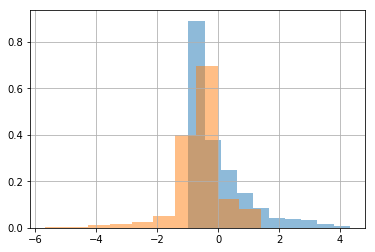


Largest Property Use Type - Gross Floor Area (ft²)
--------------------------------------------------


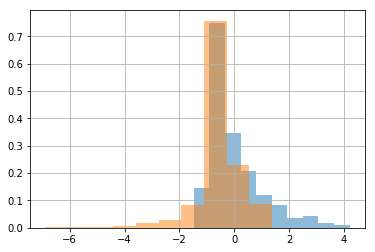


Year Built
----------


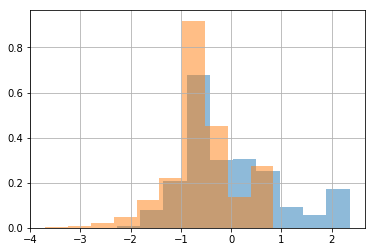


Number of Buildings - Self-reported
-----------------------------------


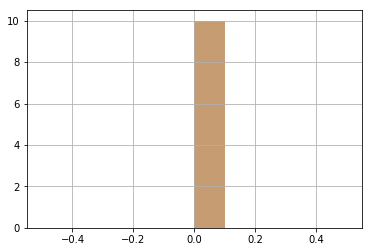


Occupancy
---------


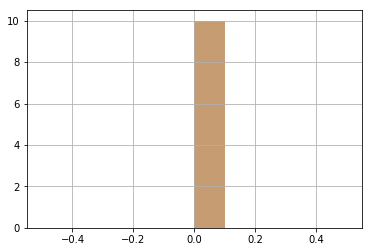


Weather Normalized Site Electricity Intensity (kWh/ft²)
-------------------------------------------------------


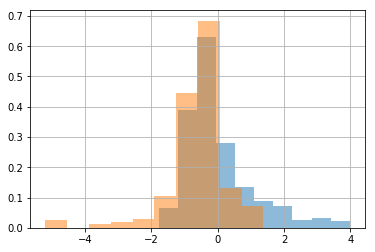


Weather Normalized Site Natural Gas Intensity (therms/ft²)
----------------------------------------------------------


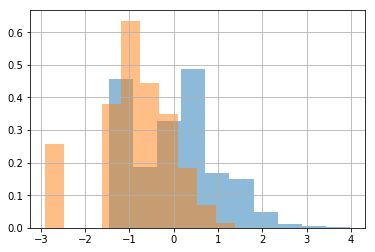


Natural Gas Use (kBtu)
----------------------


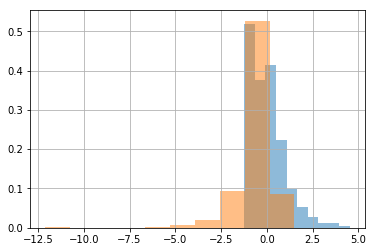


Weather Normalized Site Natural Gas Use (therms)
------------------------------------------------


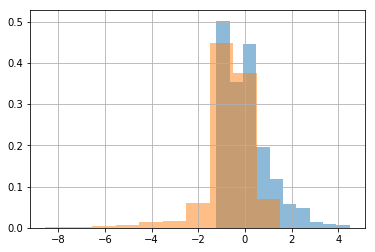


Electricity Use - Grid Purchase (kBtu)
--------------------------------------


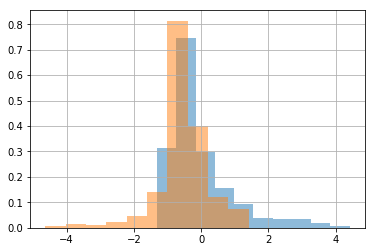


Weather Normalized Site Electricity (kWh)
-----------------------------------------


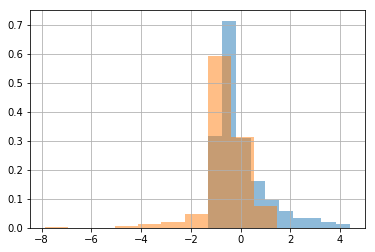


Total GHG Emissions (Metric Tons CO2e)
--------------------------------------


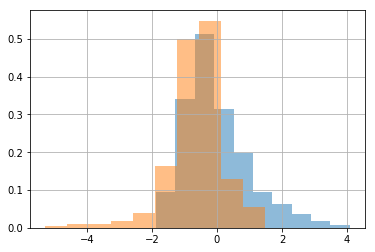


Direct GHG Emissions (Metric Tons CO2e)
---------------------------------------


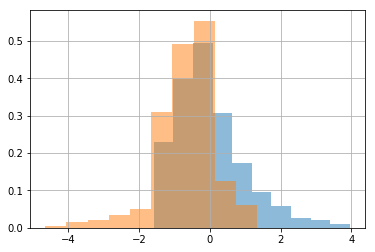


Indirect GHG Emissions (Metric Tons CO2e)
-----------------------------------------


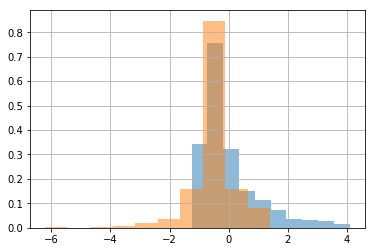


Property GFA - Self-Reported (ft²)
----------------------------------


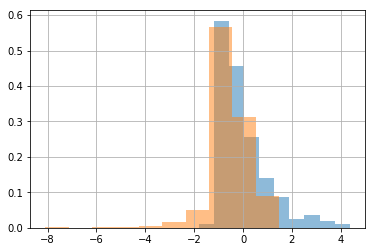


Release Date
------------


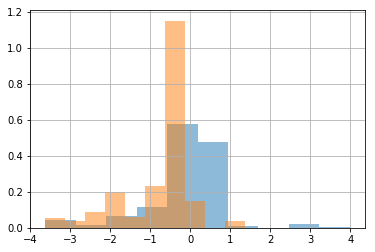


Transmission Loss (kBtu/ft²)
----------------------------


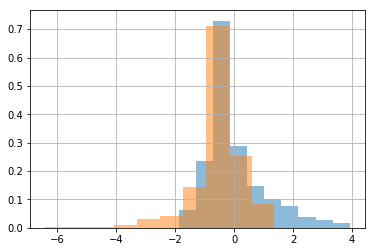


Years Old
---------


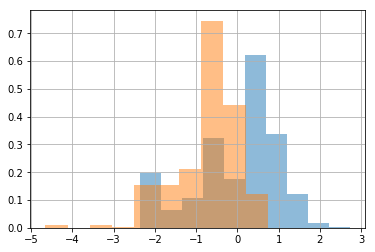

Imputing Metered Areas (Energy)...
Imputing Weather Normalized Site EUI (kBtu/ft²)...
Imputing Weather Normalized Site Electricity Intensity (kWh/ft²)...
Imputing Weather Normalized Site Natural Gas Intensity (therms/ft²)...
Imputing Weather Normalized Source EUI (kBtu/ft²)...
Imputing Natural Gas Use (kBtu)...
Imputing Weather Normalized Site Natural Gas Use (therms)...
Imputing Electricity Use - Grid Purchase (kBtu)...
Imputing Weather Normalized Site Electricity (kWh)...
Imputing Total GHG Emissions (Metric Tons CO2e)...
Imputing Direct GHG Emissions (Metric Tons CO2e)...
Imputing Water Required?...
Imputing DOF Benchmarking Submission Status...
Imputing GHG Intensity (Metric Tons CO2e/ft²)...


In [45]:
# Apply all the steps taken in this notebook to the test set
df_test = prepare_data(df_test)

In [46]:
df_test.head()

Transmission Loss (kBtu/ft²)  Weather Normalized Source EUI (kBtu/ft²)  \
11324                      0.470711                                  1.180737   
5214                      -0.264942                                  0.525495   
11458                     -0.425737                                  1.209021   
8688                      -0.607690                                 -0.551646   
7586                      -0.188775                                 -0.242882   

       Weather Normalized Site Electricity Intensity (kWh/ft²)  \
11324                                           0.501395         
5214                                           -0.398057         
11458                                          -0.584337         
8688                                           -0.646431         
7586                                           -0.211777         

       Weather Normalized Site Natural Gas Intensity (therms/ft²)  \
11324                                          -0.848934            
5214                                            0.446032            
11458                                           0.902694            
8688                                           -1.031187            
7586                                           -1.031187            

       Weather Normalized Site Electricity (kWh)  \
11324                                   0.618921   
5214                                   -0.494165   
11458                                  -0.310350   
8688                                   -0.738667   
7586                                   -0.690222   

       Weather Normalized Site Natural Gas Use (therms)  \
11324                                         -0.490149   
5214                                          -0.240433   
11458                                          0.982582   
8688                                          -0.152516   
7586                                          -0.449923   

       Property GFA - Self-Reported (ft²)  \
11324                           -0.639356   
5214                            -0.388591   
11458                           -1.057973   
8688                            -0.646727   
7586                            -0.965869   

       GHG Intensity (Metric Tons CO2e/ft²)  \
11324                              1.005660   
5214                               0.708771   
11458                              1.245531   
8688                              -0.570310   
7586                              -0.308229   

       Total GHG Emissions (Metric Tons CO2e)  Years Old    Borough  \
11324                                0.349026  -0.024801     Queens   
5214                                -2.277221  -0.313954  Manhattan   
11458                                0.327587  -0.127804     Queens   
8688                                -0.814397  -0.645220   Brooklyn   
7586                                -0.946860  -0.814489   Brooklyn   

      Primary Property Type - Self Selected Largest Property Use Type  \
11324                                 Other                     Other   
5214                    Multifamily Housing       Multifamily Housing   
11458                   Multifamily Housing       Multifamily Housing   
8688                    Multifamily Housing       Multifamily Housing   
7586                    Multifamily Housing       Multifamily Housing   

      Water Required?  ENERGY STAR Score  
11324             Yes               71.0  
5214               No               39.0  
11458              No               19.0  
8688              Yes               87.0  
7586              Yes               75.0

#### Linear Model

In [68]:
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score

In [69]:
def split_for_linear_model(df):
    X = pd.get_dummies(df)
    y = X.loc[:, 'ENERGY STAR Score'] # y is the target
    X = X.loc[:, X.columns != 'ENERGY STAR Score'] # Remove the target  
    return X, y

##### Training

In [84]:
X_train, y_train = split_for_linear_model(df_train)
X_train.columns

Index(['Transmission Loss (kBtu/ft²)',
       'Weather Normalized Source EUI (kBtu/ft²)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Weather Normalized Site Electricity (kWh)',
       'Weather Normalized Site Natural Gas Use (therms)',
       'Property GFA - Self-Reported (ft²)',
       'GHG Intensity (Metric Tons CO2e/ft²)',
       'Total GHG Emissions (Metric Tons CO2e)', 'Years Old', 'Borough_Bronx',
       'Borough_Brooklyn', 'Borough_Manhattan', 'Borough_Queens',
       'Borough_Other',
       'Primary Property Type - Self Selected_Multifamily Housing',
       'Primary Property Type - Self Selected_Office',
       'Primary Property Type - Self Selected_Other',
       'Largest Property Use Type_Multifamily Housing',
       'Largest Property Use Type_Office', 'Largest Property Use Type_Other',
       'Water Required?_No', 'Water Required?_Yes'],
      dtype='object')

In [85]:
lm = linear_model.LinearRegression()
lm = lm.fit(X_train, y_train)
predictions = lm.predict(X_train)
print_title('R-squared metric - on training set')
r2_score(y_train, predictions)


R-squared metric - on training set
----------------------------------


0.6815616379694287

##### Validation

In [86]:
X_valid, y_valid = split_for_linear_model(df_valid)
X_valid.columns

Index(['Transmission Loss (kBtu/ft²)',
       'Weather Normalized Source EUI (kBtu/ft²)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Weather Normalized Site Electricity (kWh)',
       'Weather Normalized Site Natural Gas Use (therms)',
       'Property GFA - Self-Reported (ft²)',
       'GHG Intensity (Metric Tons CO2e/ft²)',
       'Total GHG Emissions (Metric Tons CO2e)', 'Years Old', 'Borough_Bronx',
       'Borough_Brooklyn', 'Borough_Manhattan', 'Borough_Queens',
       'Borough_Staten Island', 'Borough_Other',
       'Primary Property Type - Self Selected_Automobile Dealership',
       'Primary Property Type - Self Selected_College/University',
       'Primary Property Type - Self Selected_Courthouse',
       'Primary Property Type - Self Selected_Distribution Center',
       'Primary Property Type - Self Selected_Financial Office',
       'Primary Property Type - Self Selected_Fit

In [87]:
predictions = lm.predict(X_valid)
# print_title('R-squared metric - on validation set')
# r2_score(y_valid, predictions)

ValueError: shapes (1086,88) and (23,) not aligned: 88 (dim 1) != 23 (dim 0)

<a id='reflect'></a>

## Reflect